# Import the libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm

# Data analysis

In [14]:
data_train = pd.read_csv('internship_train.csv')
data_train

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,328,44,320,364,7,73,4.898979,0.563878,1,315,...,0.266362,6.185887,7.716837,10.144664,1.711649,3.849704,12.401903,14.195540,2.371207,24.563878
89996,217,472,174,327,255,389,-3.605551,0.861690,0,144,...,5.147059,4.209660,14.482770,1.375031,6.386263,10.107582,12.637902,6.576331,6.863238,13.861690
89997,189,406,213,57,494,190,6.164414,0.633704,1,221,...,14.902807,2.886534,8.683168,4.522339,1.556421,10.971184,7.792226,8.422623,3.041409,38.633704
89998,418,478,163,35,390,77,-3.605551,0.687309,0,289,...,12.743029,2.525611,11.050145,6.589943,12.622192,10.596839,0.647584,8.746364,1.246682,13.687309


In [15]:
data_train.shape

(90000, 54)

In [16]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [17]:
data_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


In [18]:
corelations = data_train.corr()
corelations

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,1.000000,0.002009,0.001170,0.002957,-0.003764,-0.007362,0.007855,0.007174,0.008011,0.002339,...,-4.142468e-03,-6.524791e-03,0.003532,0.000310,-0.002639,0.004795,0.000287,-0.001647,-0.003612,0.002427
1,0.002009,1.000000,-0.001849,-0.004653,-0.002433,-0.002037,0.004181,0.005790,0.004095,0.002592,...,-2.874705e-03,-2.679358e-03,0.001402,-0.007900,-0.004497,0.002015,0.003119,0.006038,-0.003173,-0.005545
2,0.001170,-0.001849,1.000000,-0.000775,0.003082,-0.002161,0.002296,-0.000299,0.001983,0.005753,...,1.091757e-03,-5.881274e-04,0.000643,0.003106,0.001611,-0.001444,0.001006,-0.001753,0.002812,0.001003
3,0.002957,-0.004653,-0.000775,1.000000,-0.003623,-0.001038,0.000223,-0.004290,0.000966,0.000202,...,-5.875674e-03,4.776979e-03,0.001334,0.000528,0.006892,0.002790,0.002082,0.000373,0.002534,0.002807
4,-0.003764,-0.002433,0.003082,-0.003623,1.000000,-0.000992,0.005602,-0.004459,0.004763,-0.000778,...,-1.412970e-03,6.178204e-03,-0.000873,-0.002625,-0.001883,0.002884,-0.000702,0.001067,-0.002388,-0.001300
5,-0.007362,-0.002037,-0.002161,-0.001038,-0.000992,1.000000,-0.003869,-0.001455,-0.002289,0.004740,...,-1.159929e-03,-5.225882e-03,-0.000776,-0.000087,-0.004682,0.000988,0.004735,-0.004100,0.004946,-0.002125
6,0.007855,0.004181,0.002296,0.000223,0.005602,-0.003869,1.000000,-0.002051,0.940016,-0.007185,...,5.795666e-04,-3.255019e-05,0.005084,-0.002972,-0.002300,0.003611,0.001542,-0.000944,0.002867,0.000666
7,0.007174,0.005790,-0.000299,-0.004290,-0.004459,-0.001455,-0.002051,1.000000,0.000779,-0.007187,...,-5.102514e-03,2.936529e-03,0.003277,-0.001273,-0.000669,0.001930,0.001085,0.008363,0.001724,0.012103
8,0.008011,0.004095,0.001983,0.000966,0.004763,-0.002289,0.940016,0.000779,1.000000,-0.007370,...,3.567263e-04,-1.795987e-03,0.006837,-0.003748,-0.002903,0.004119,0.000960,0.000786,0.001725,0.000347
9,0.002339,0.002592,0.005753,0.000202,-0.000778,0.004740,-0.007185,-0.007187,-0.007370,1.000000,...,1.202068e-03,1.417241e-03,-0.002239,0.002636,0.004146,0.001255,-0.000016,-0.003785,-0.003467,0.001504


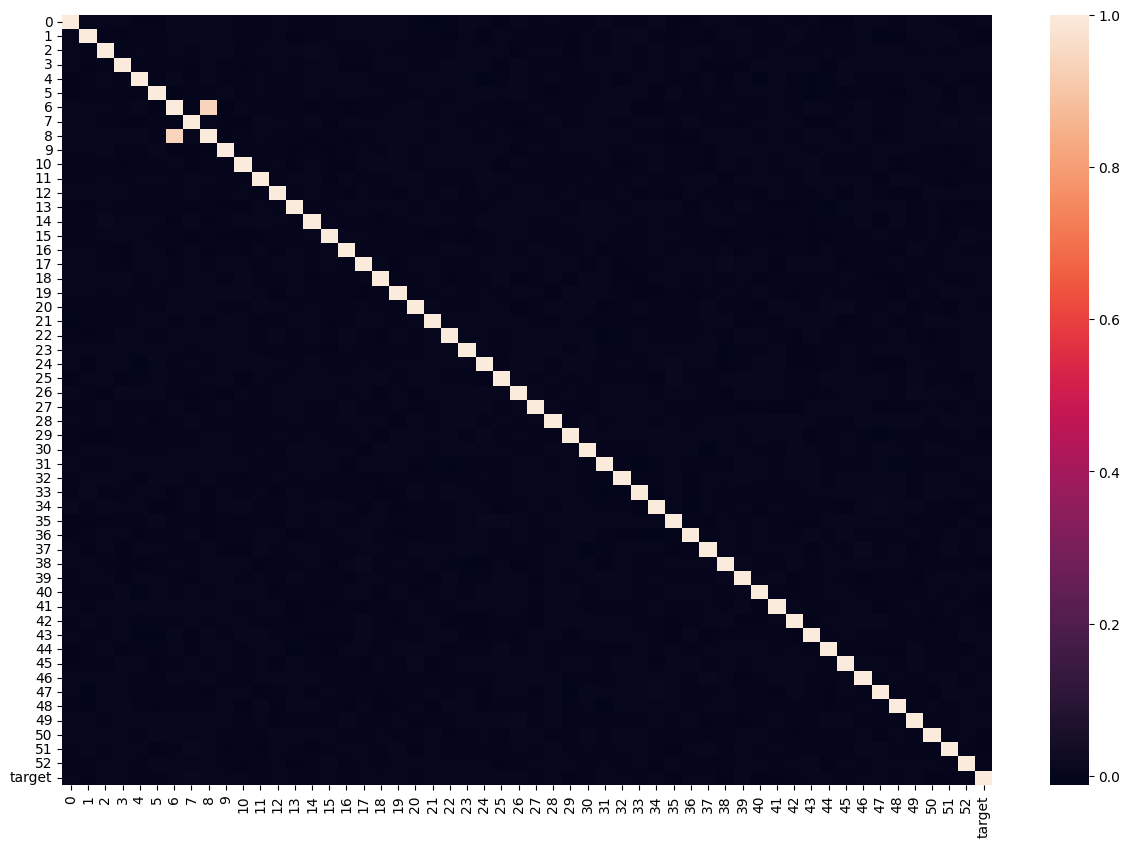

In [19]:
correlation_map = corelations
plt.figure(figsize = (15, 10))
sns.heatmap(correlation_map, cbar = True)
plt.show()

In [20]:
data_train.shape

(90000, 54)

C:\Users\vanzo\AppData\Local\Temp\ipykernel_11276\334181232.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))


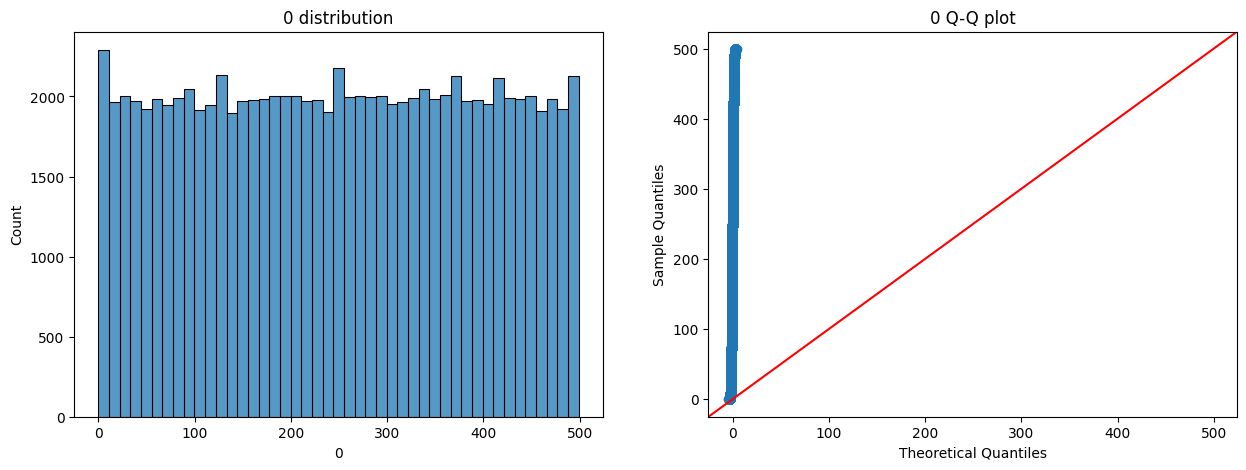

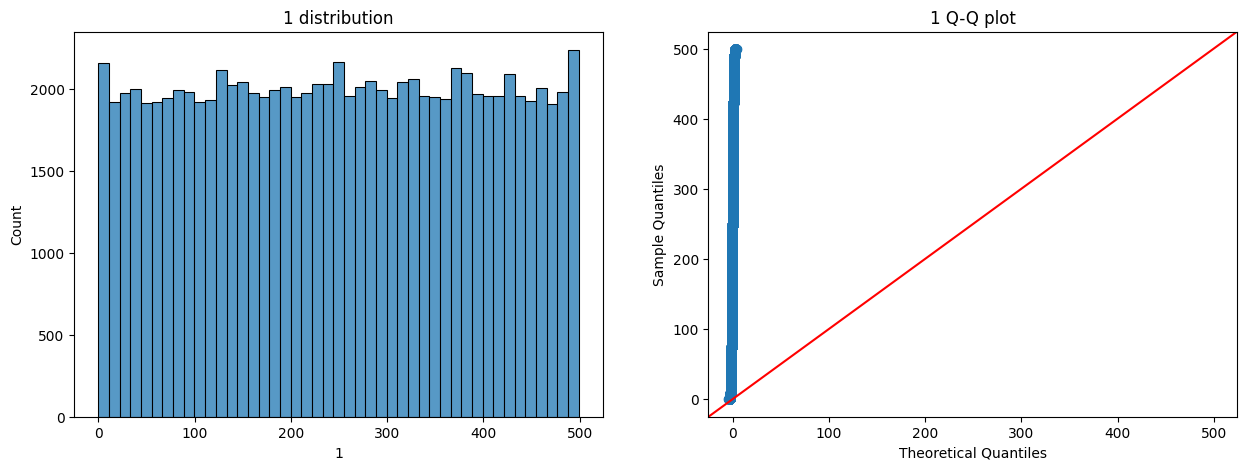

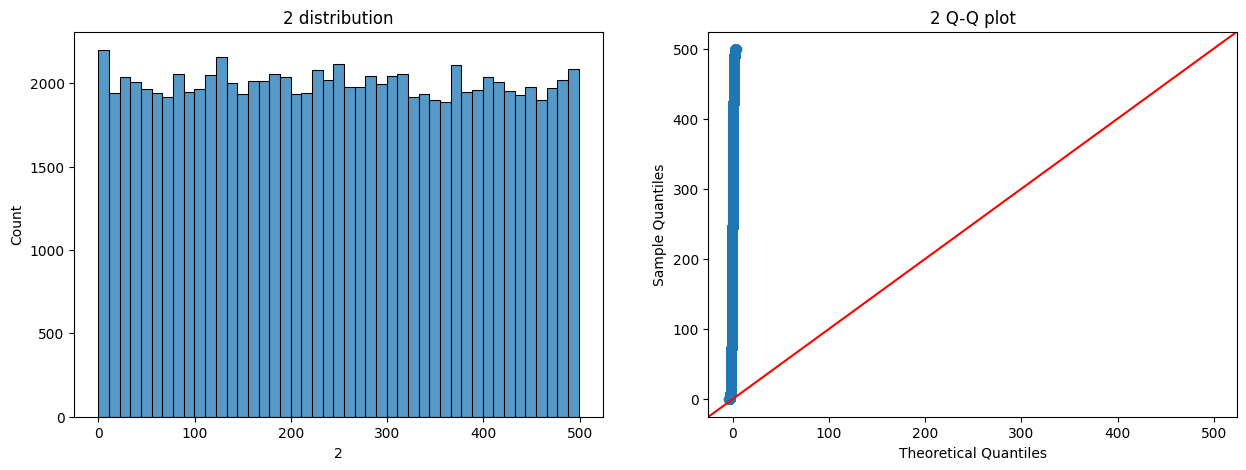

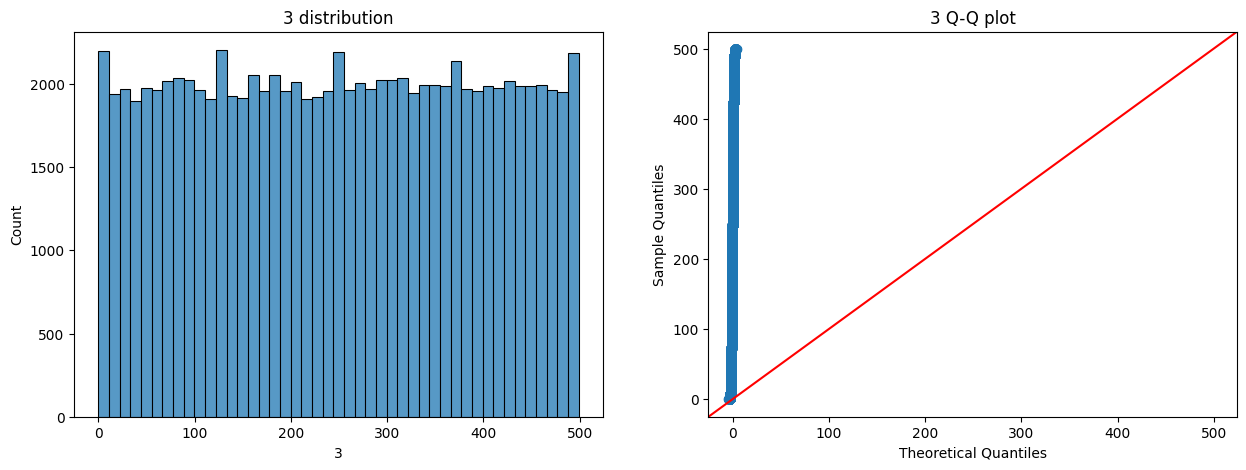

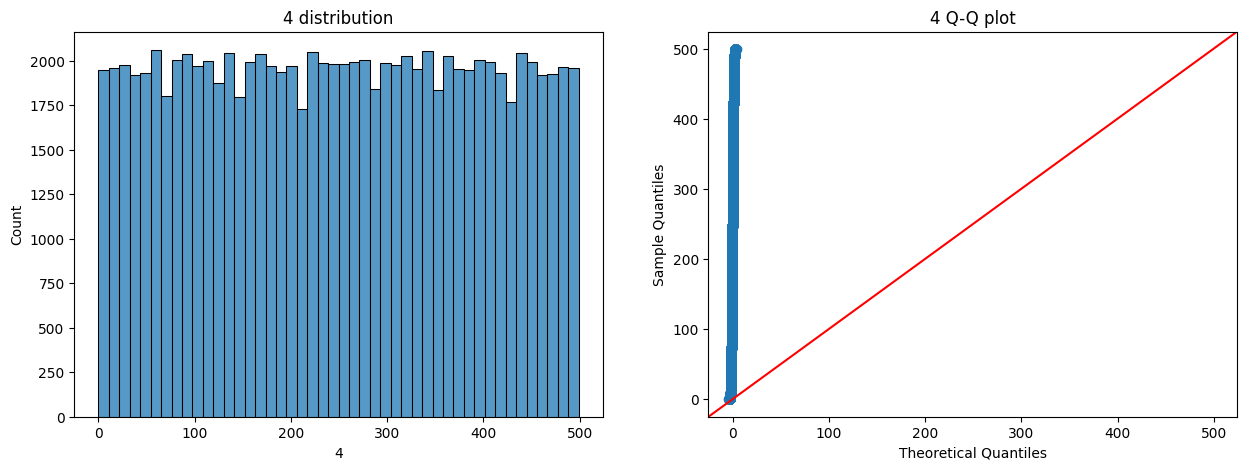

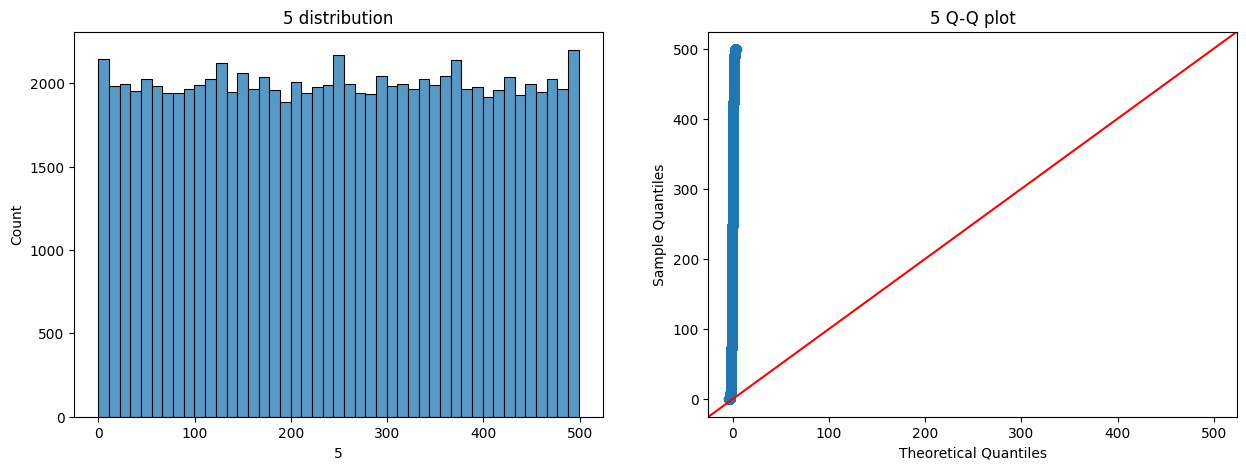

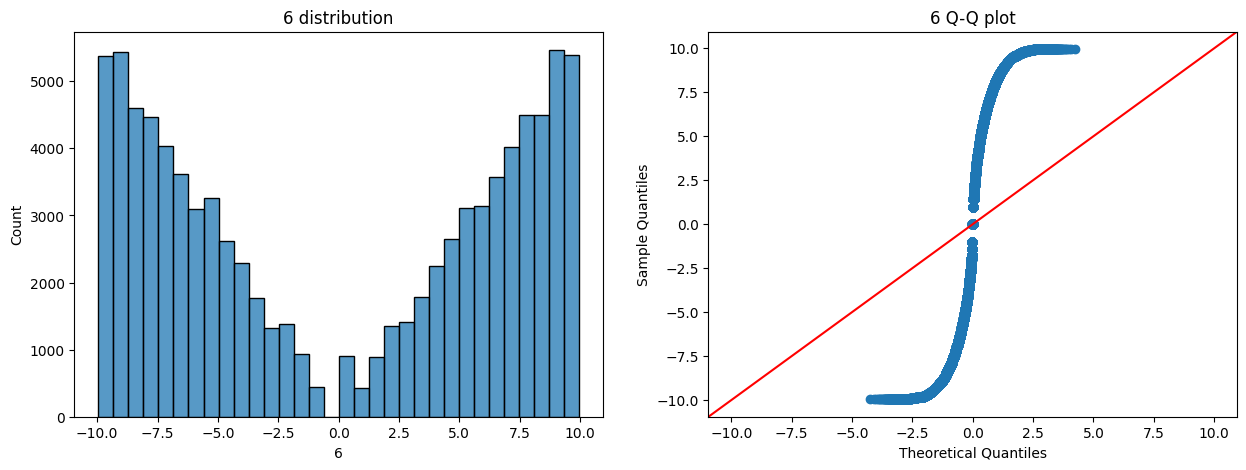

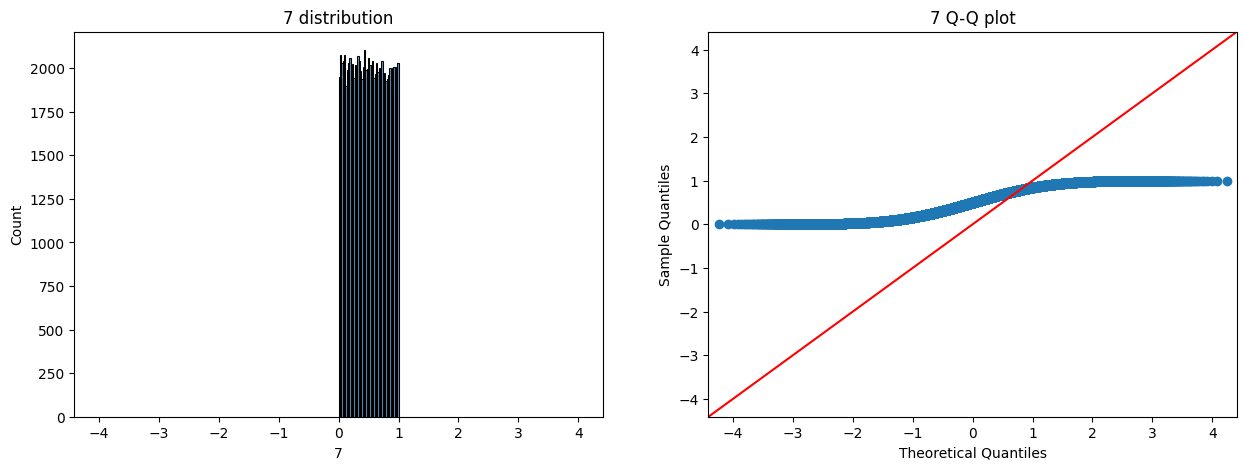

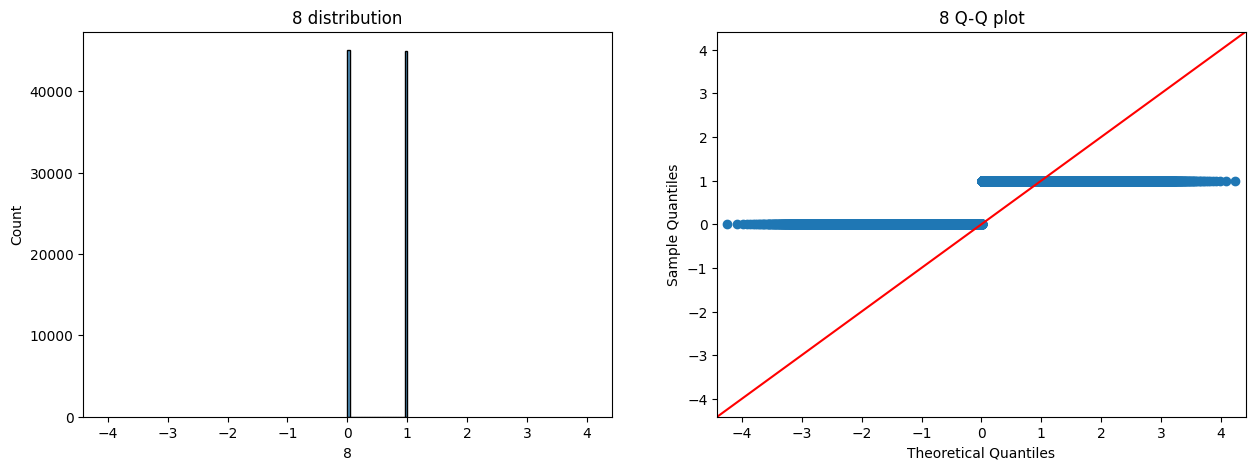

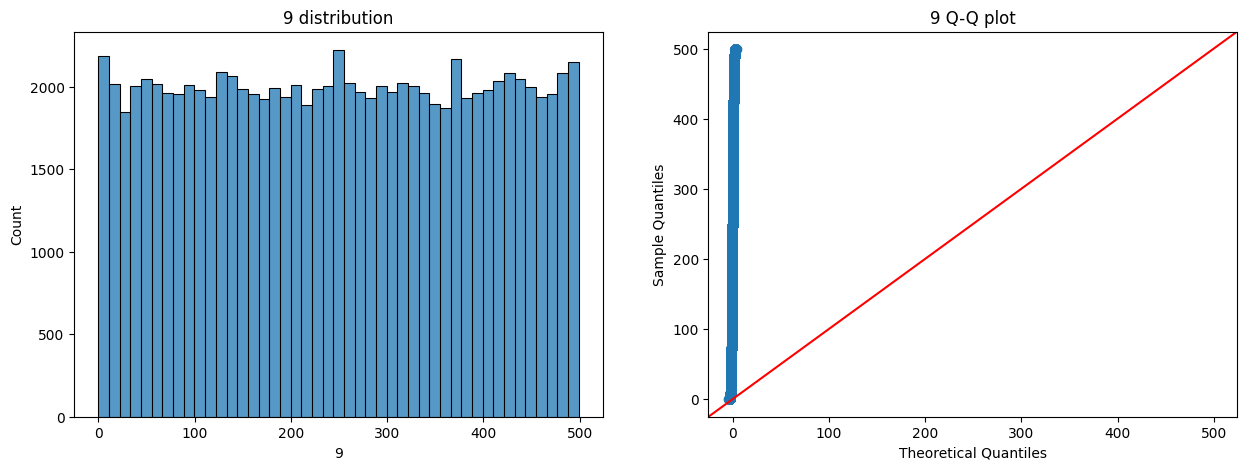

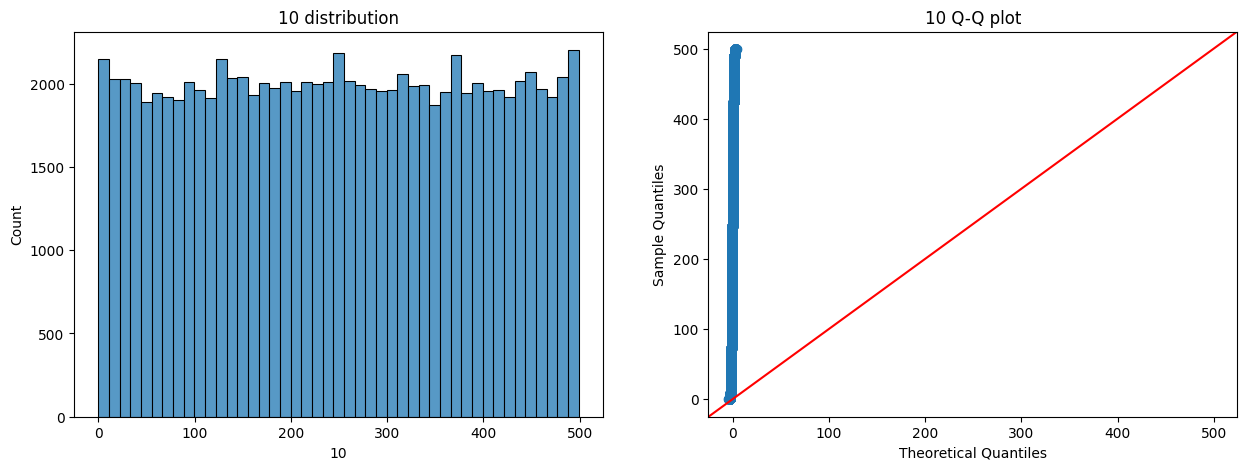

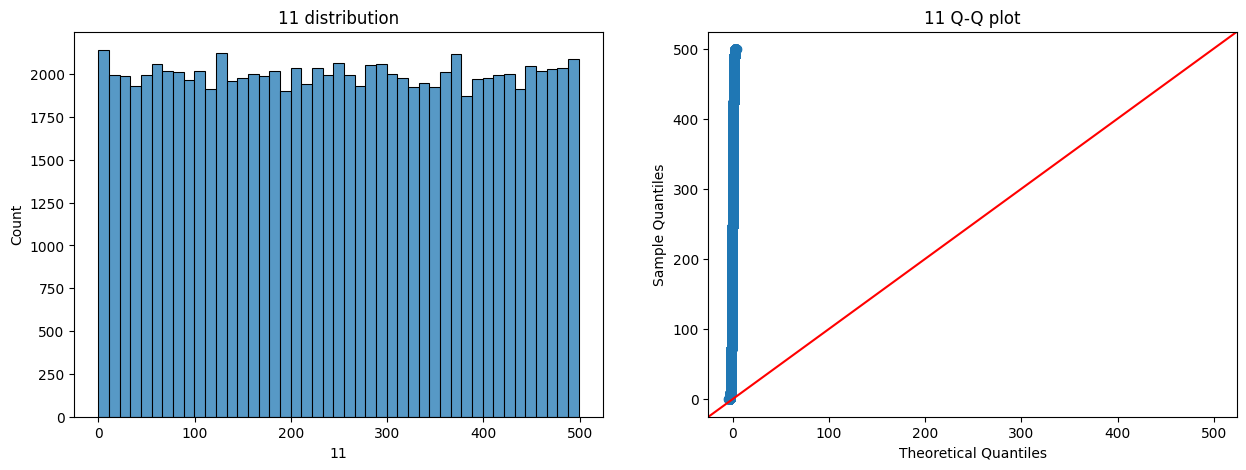

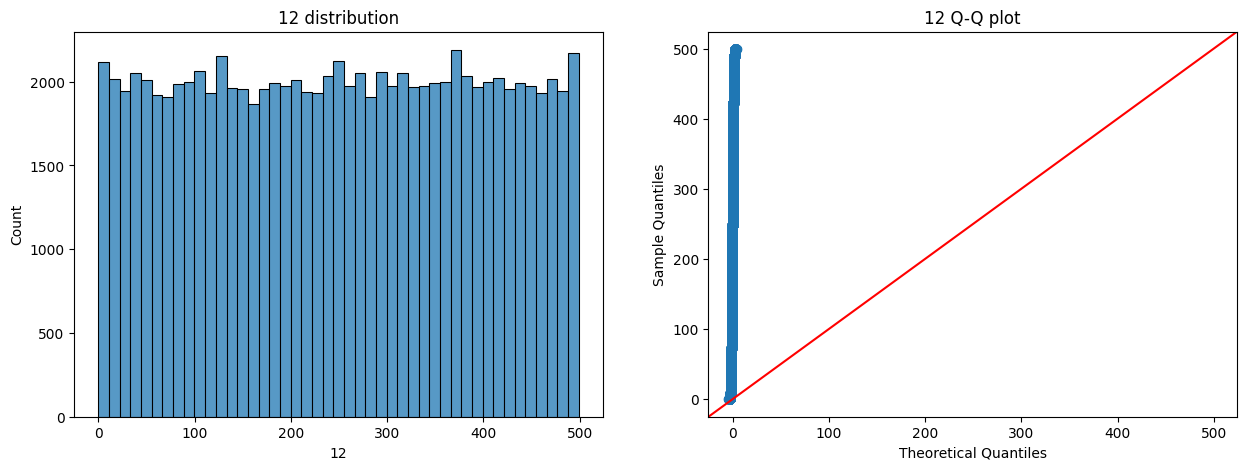

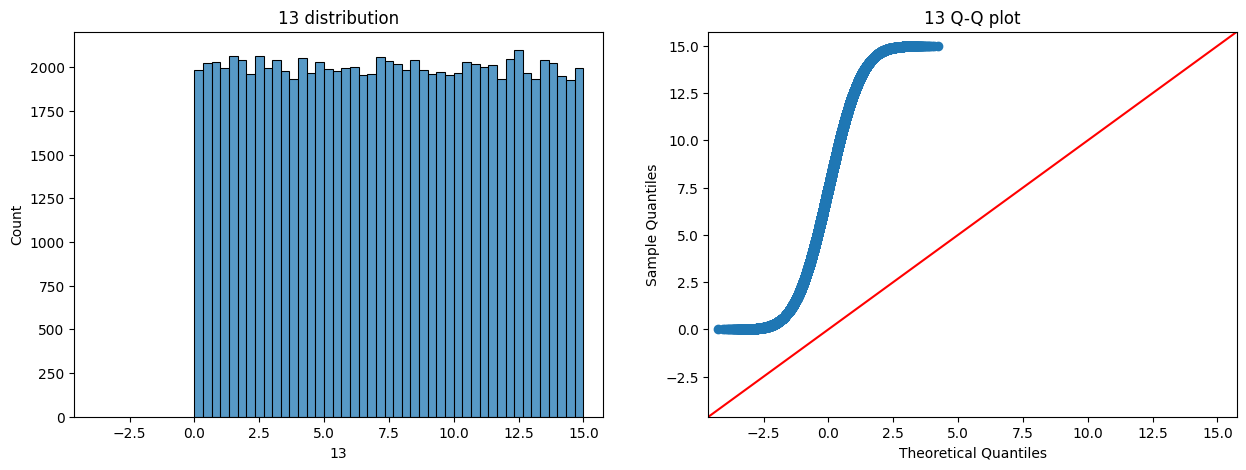

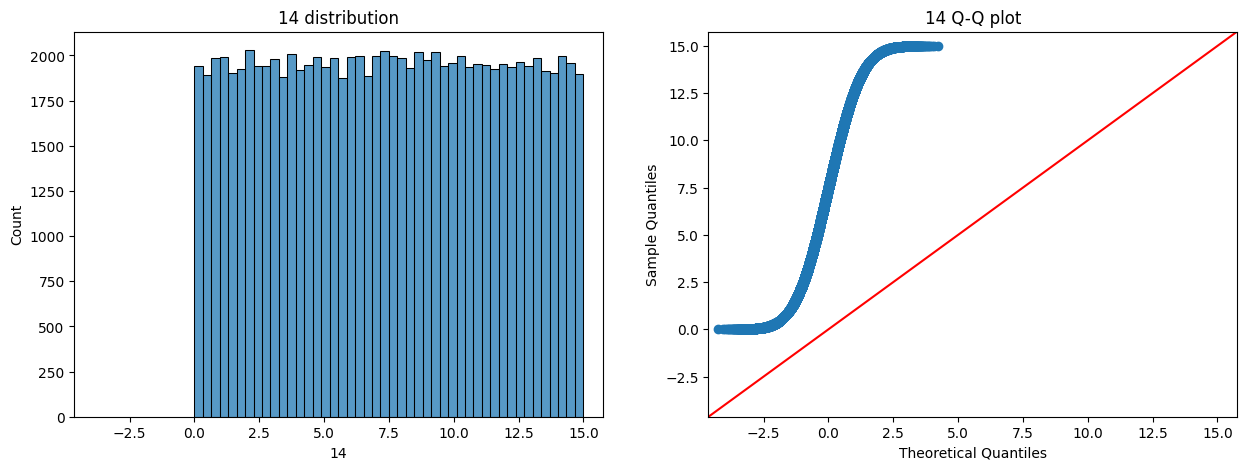

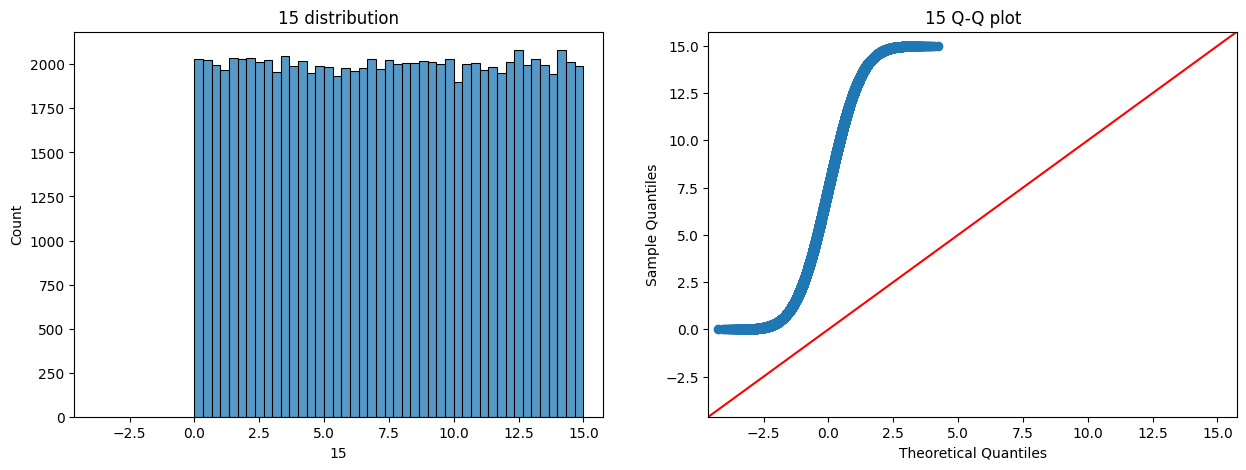

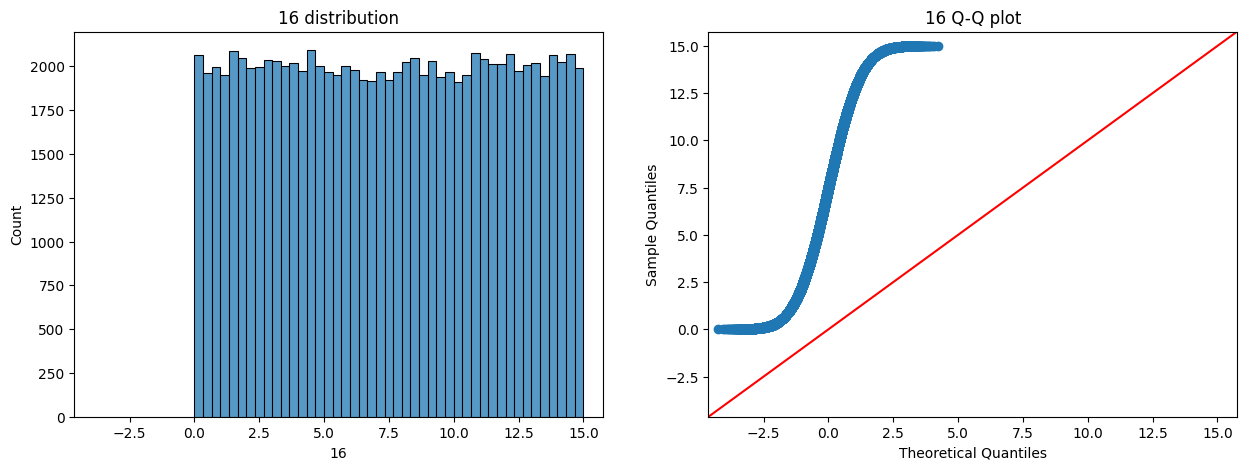

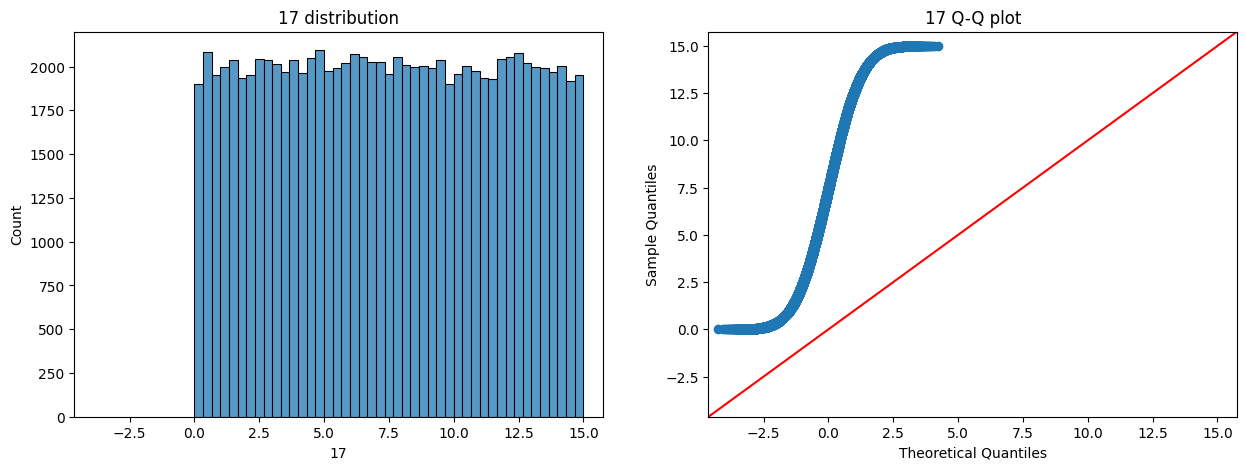

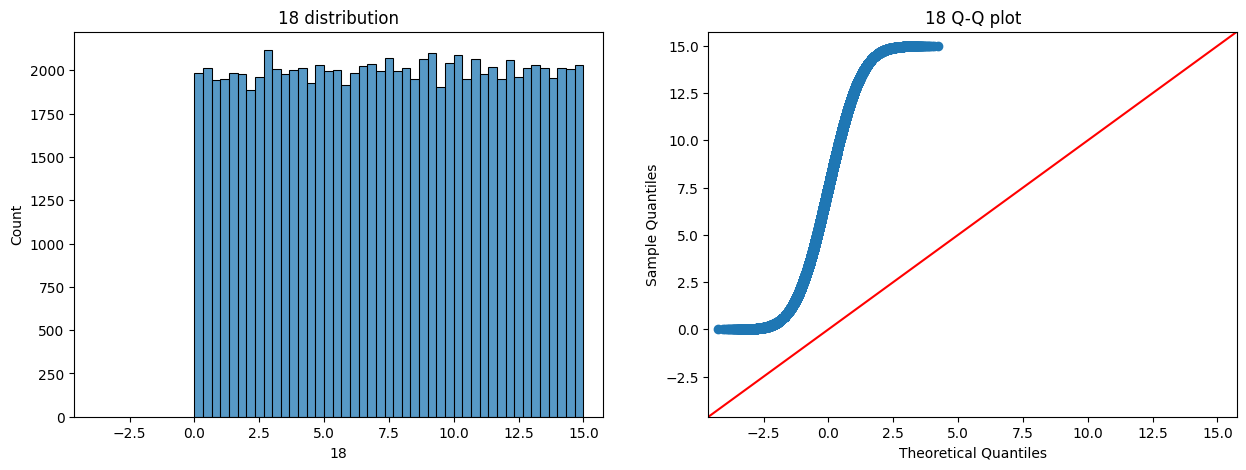

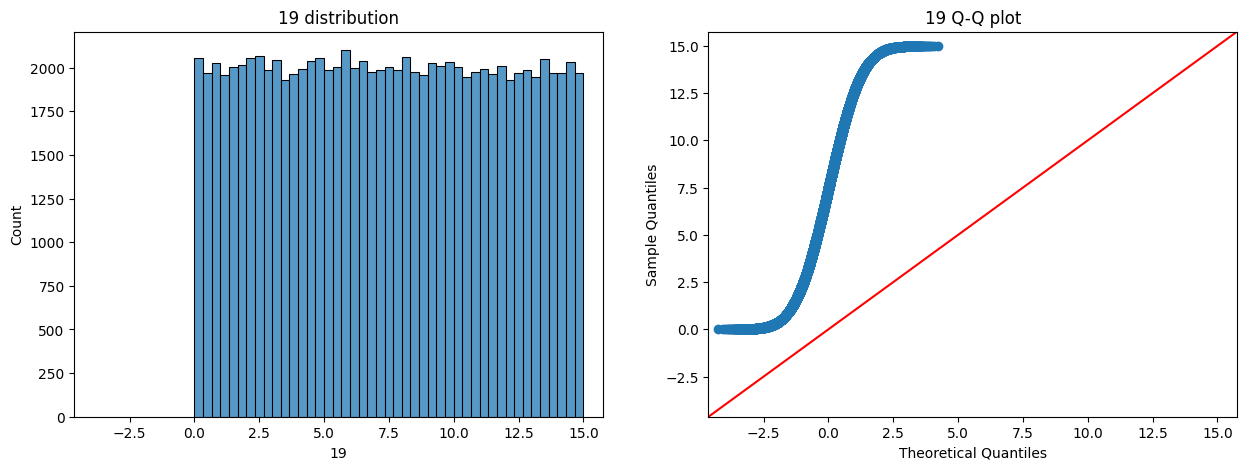

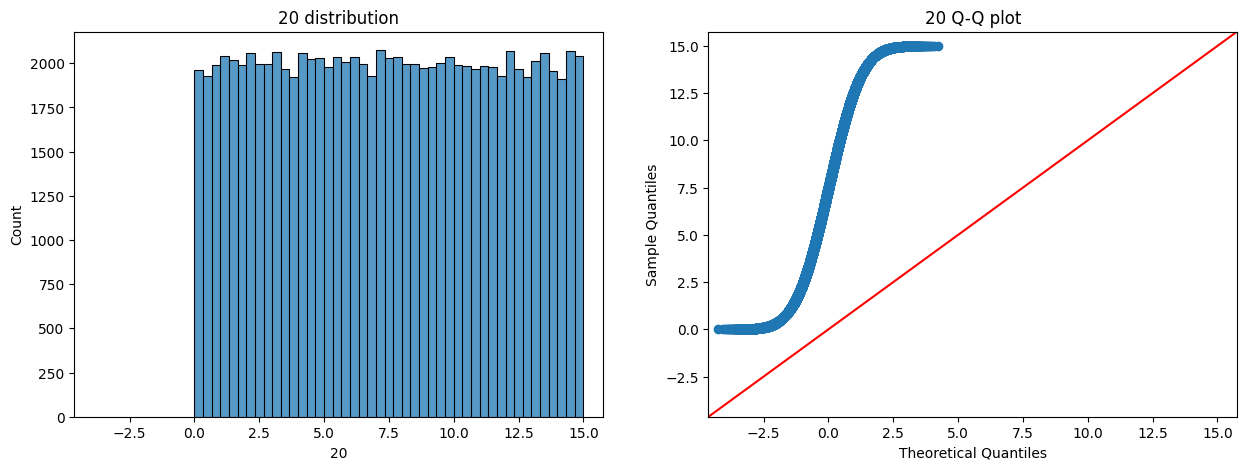

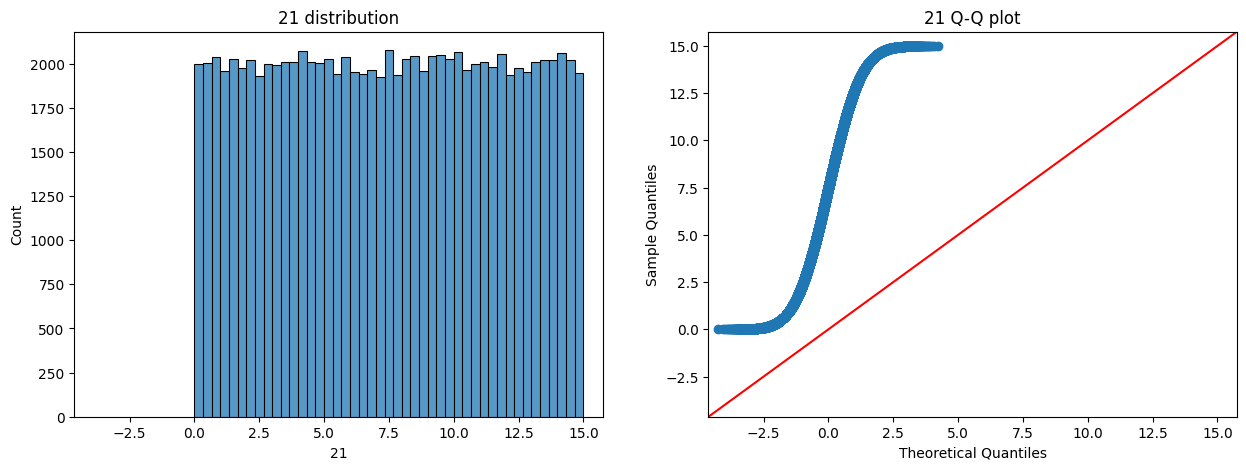

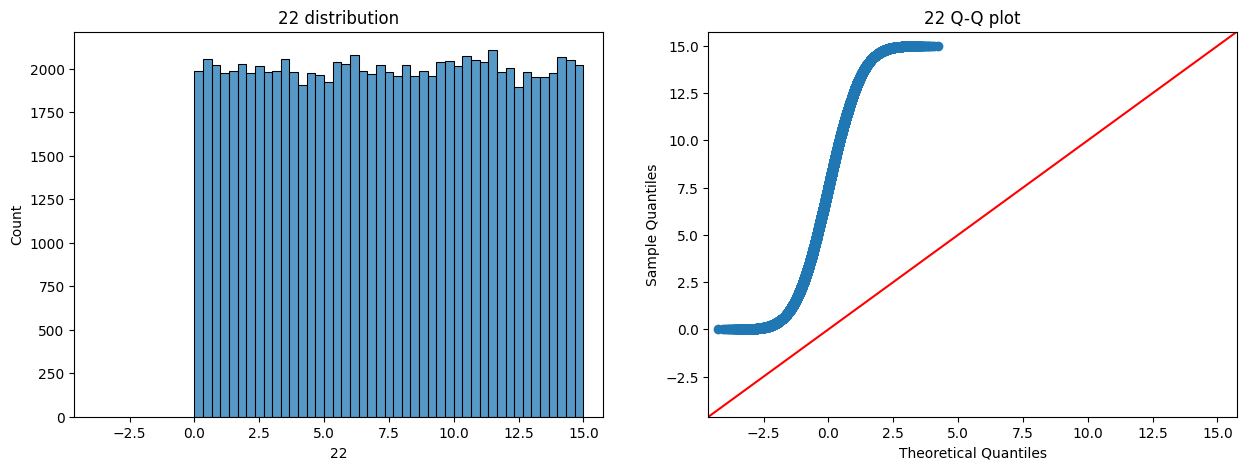

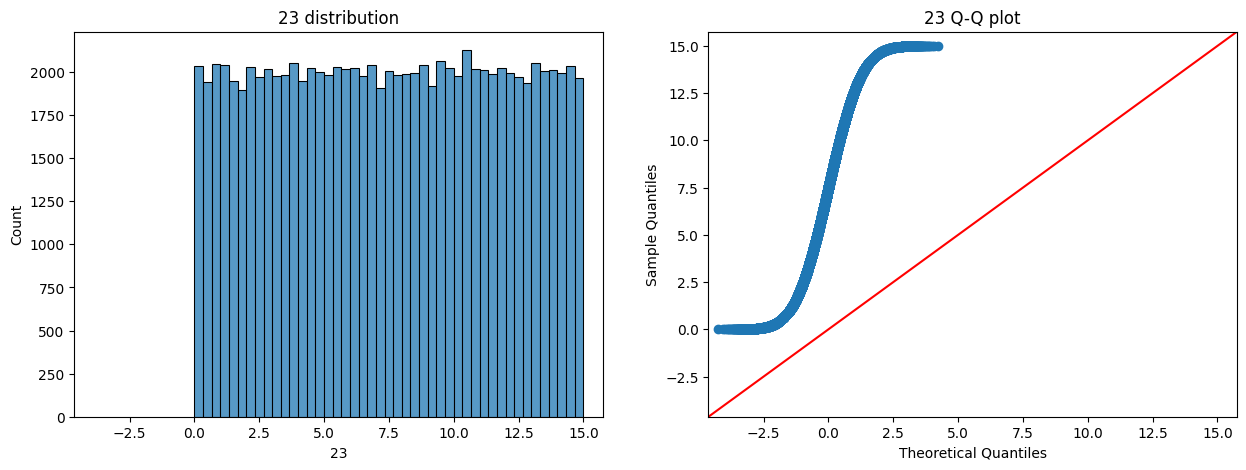

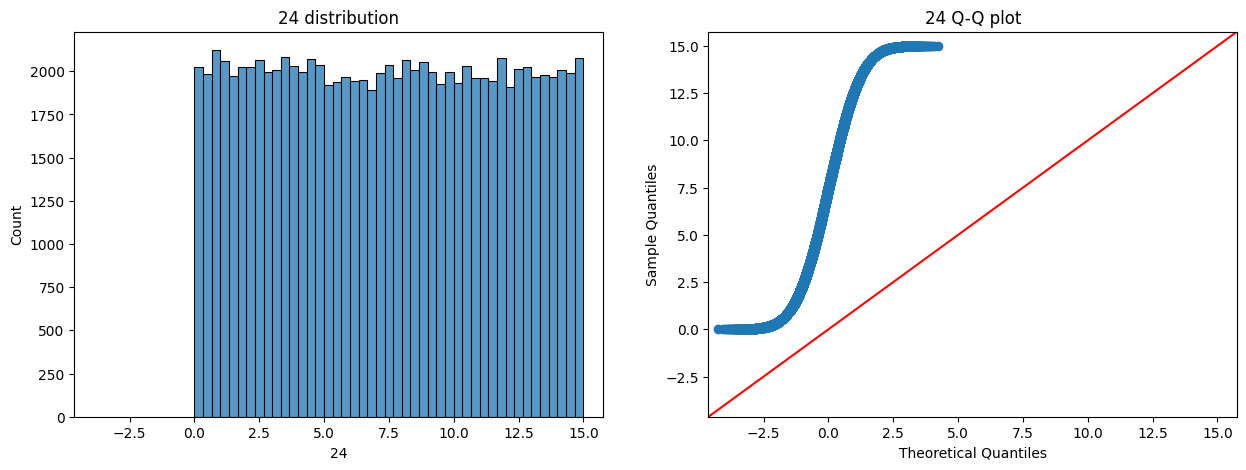

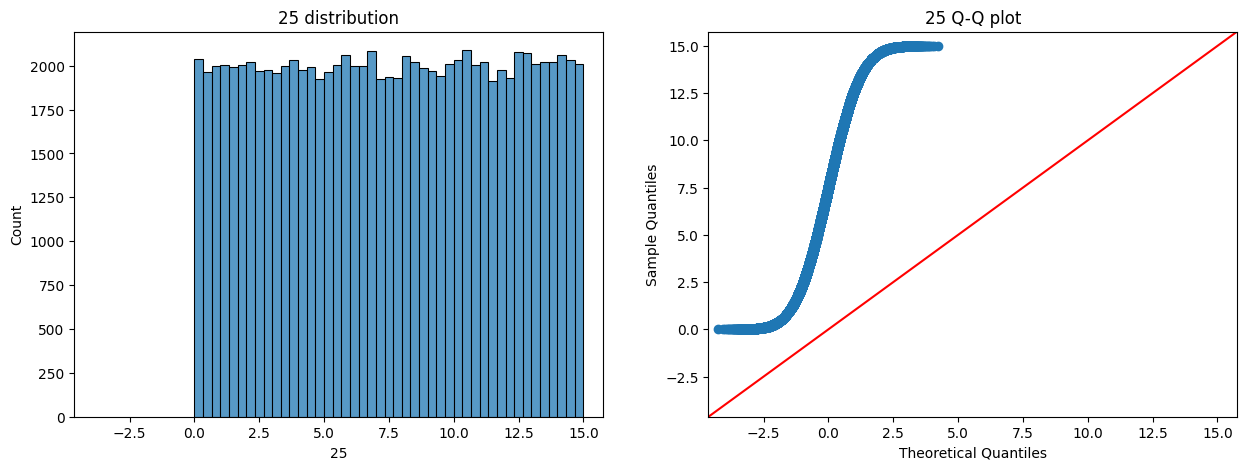

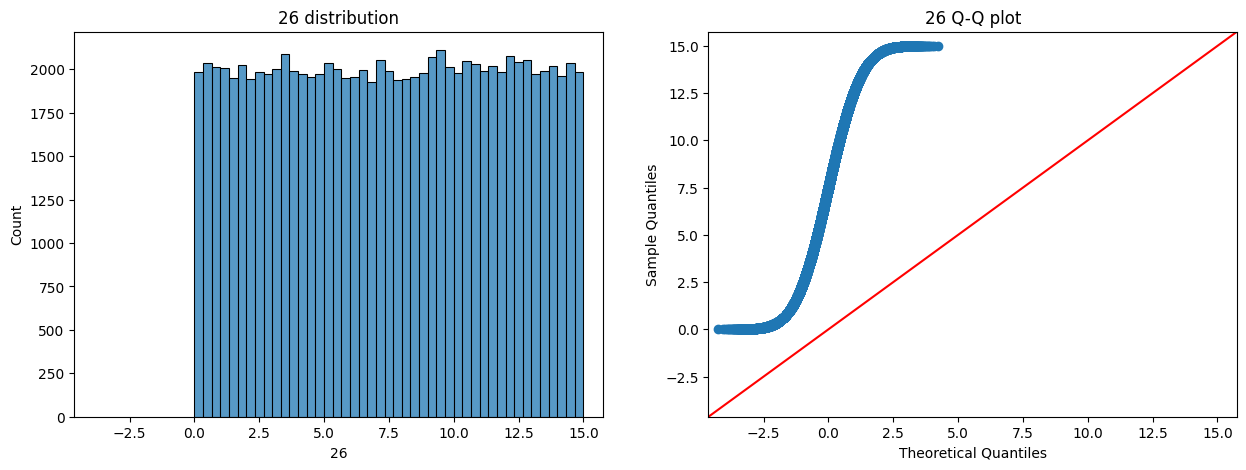

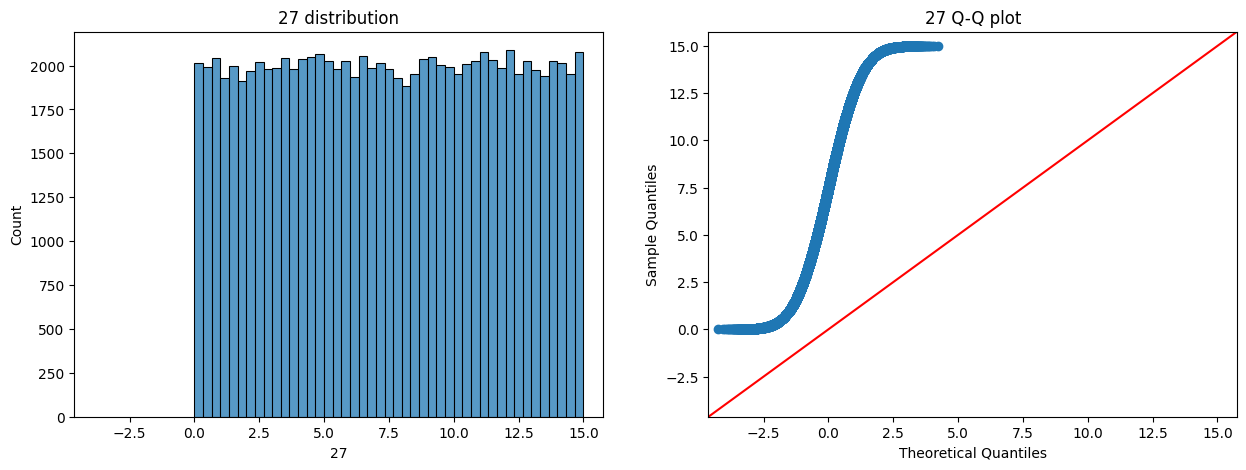

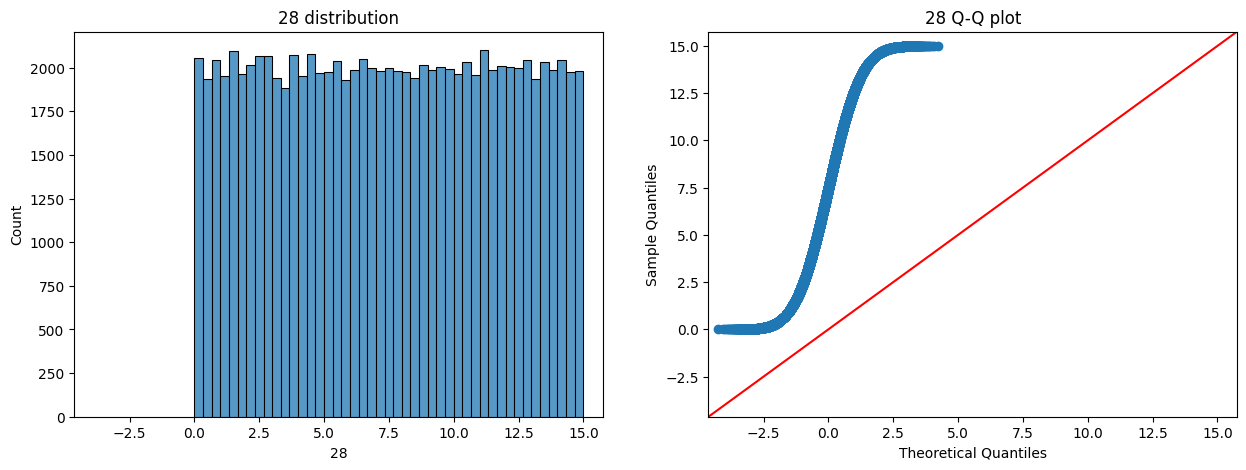

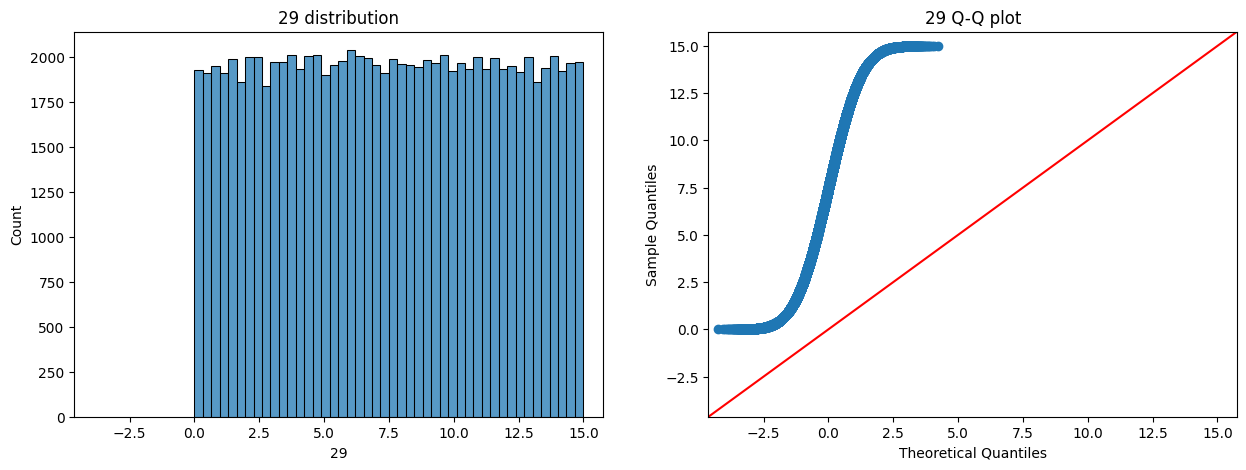

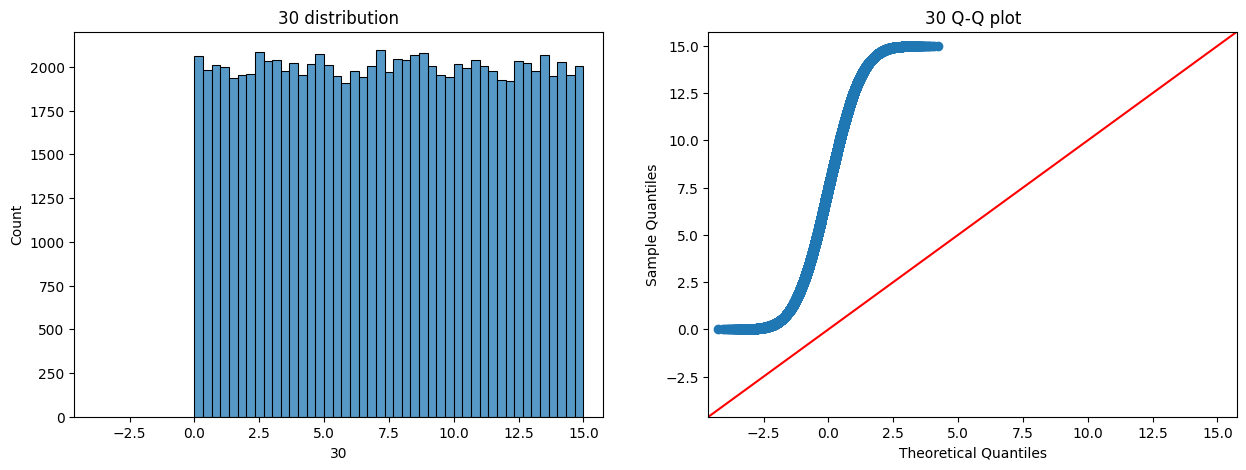

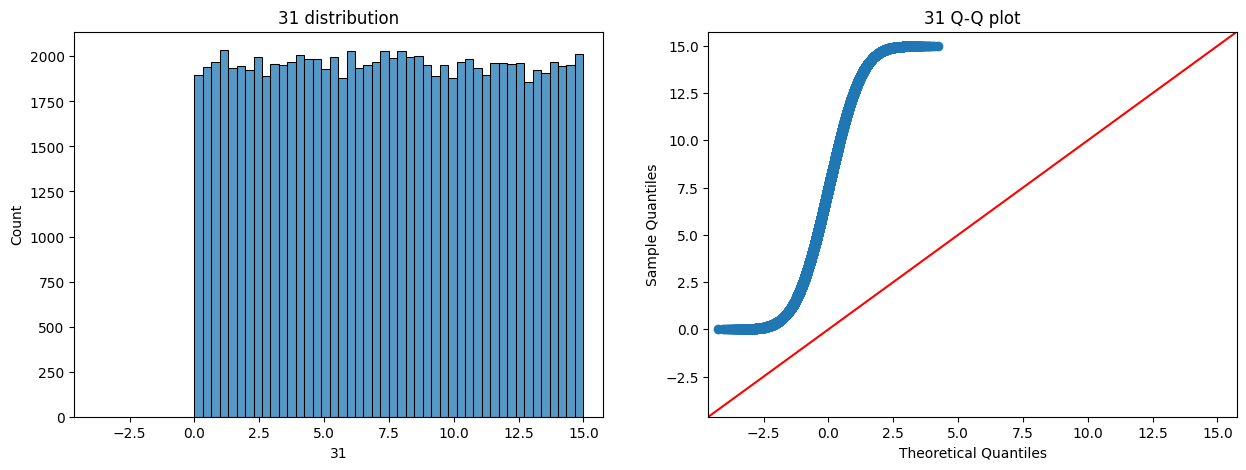

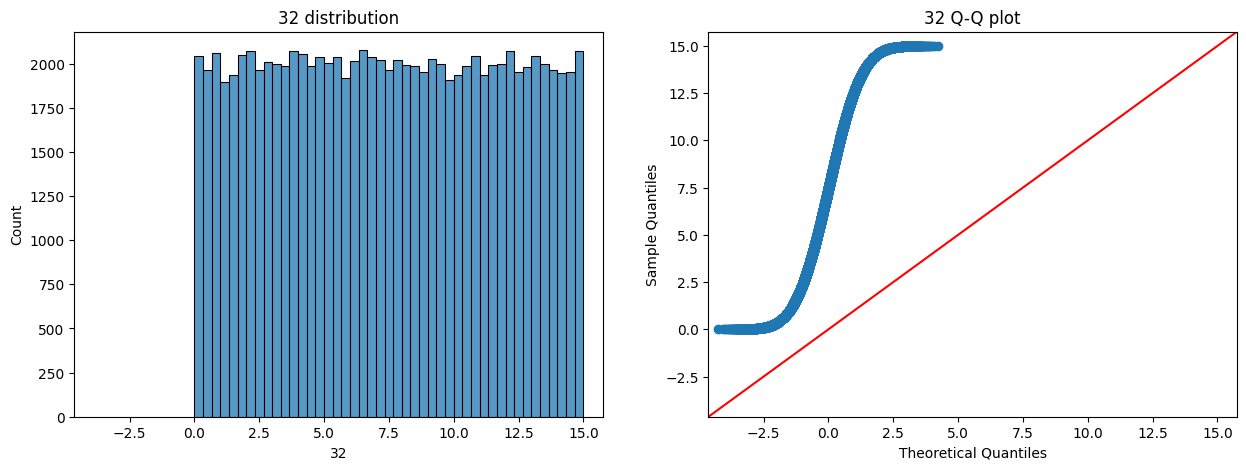

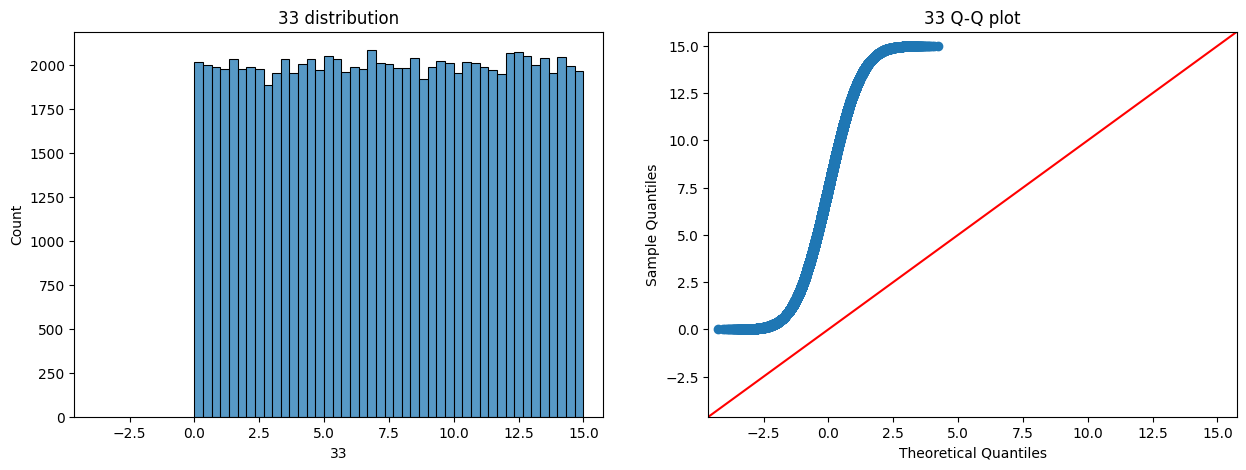

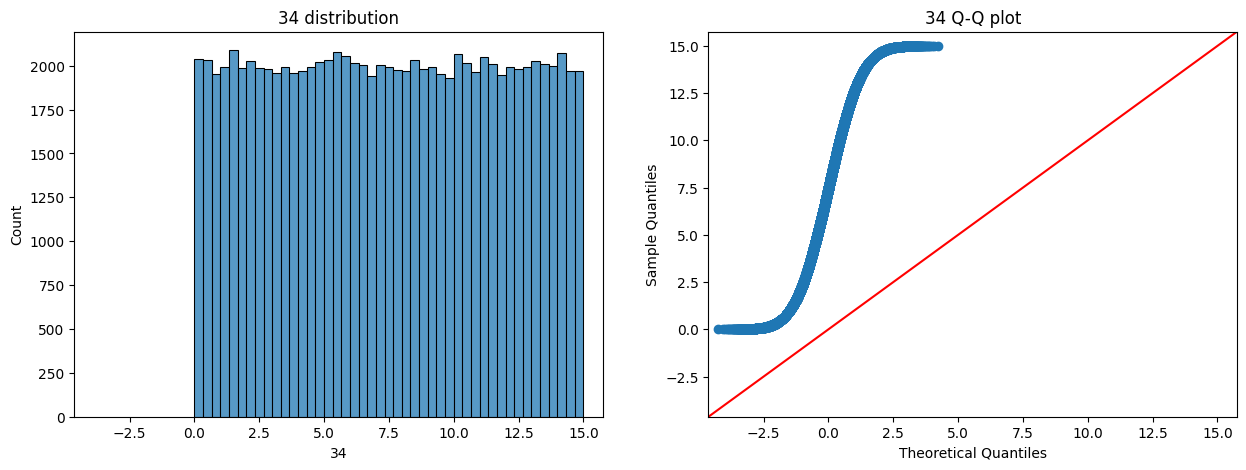

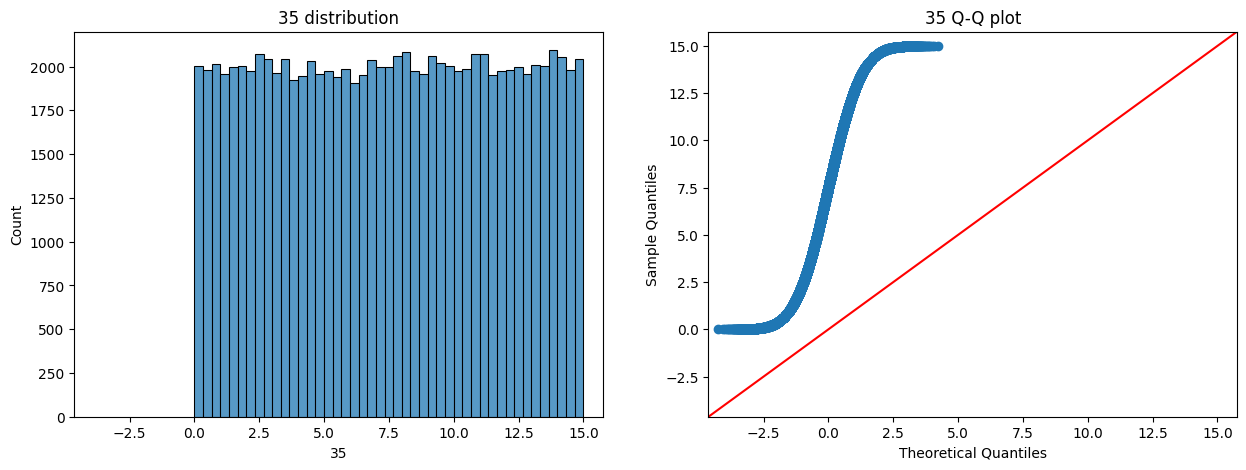

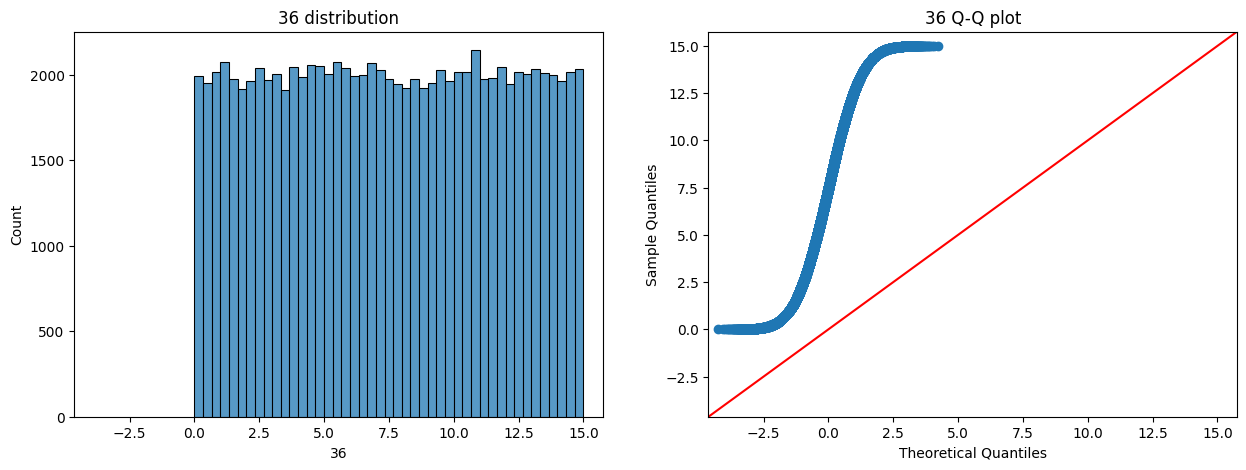

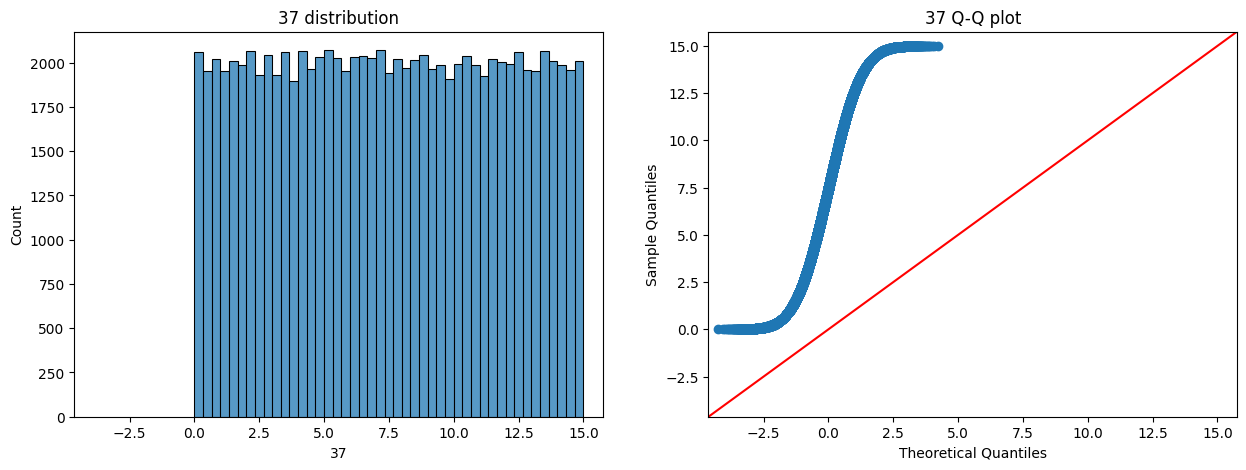

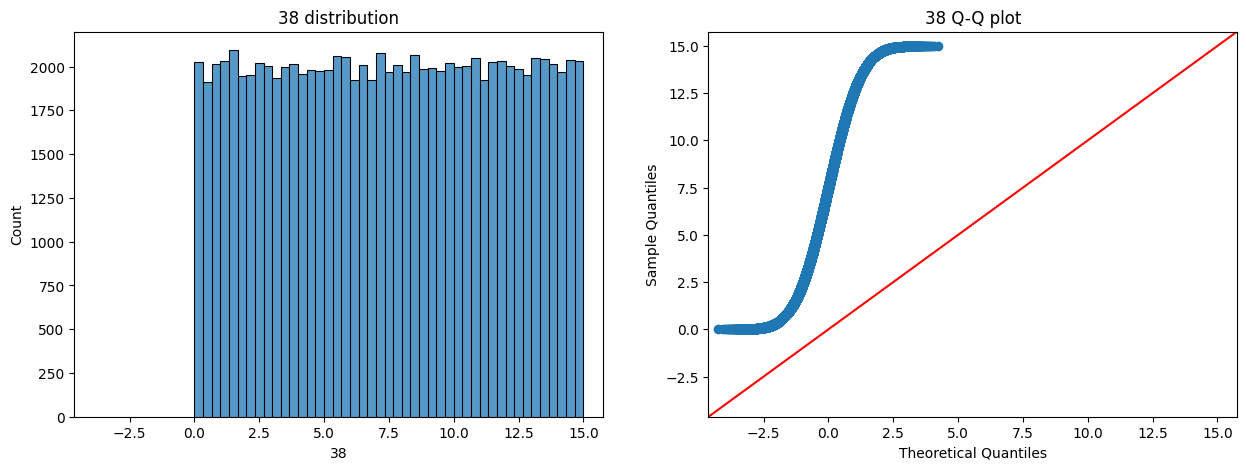

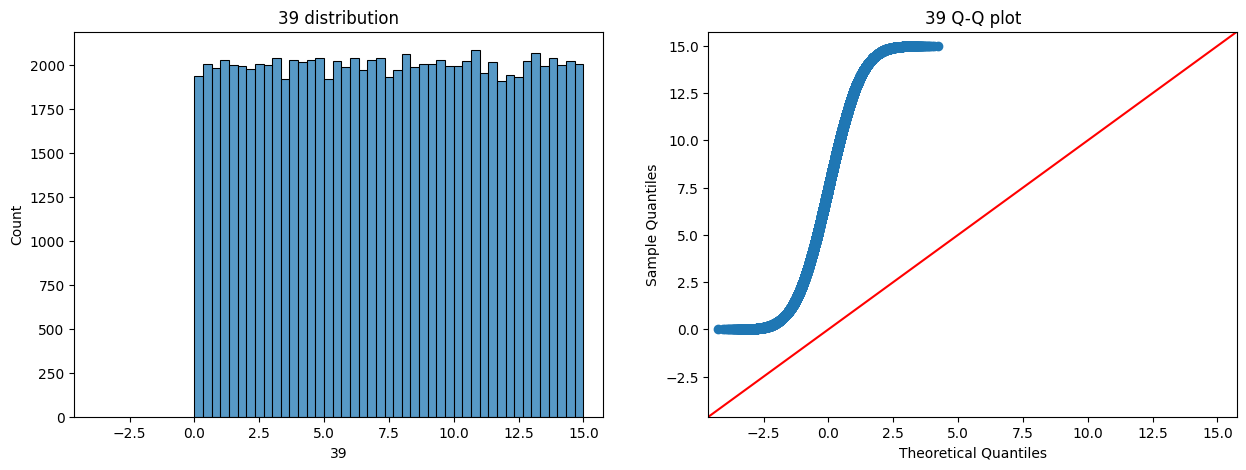

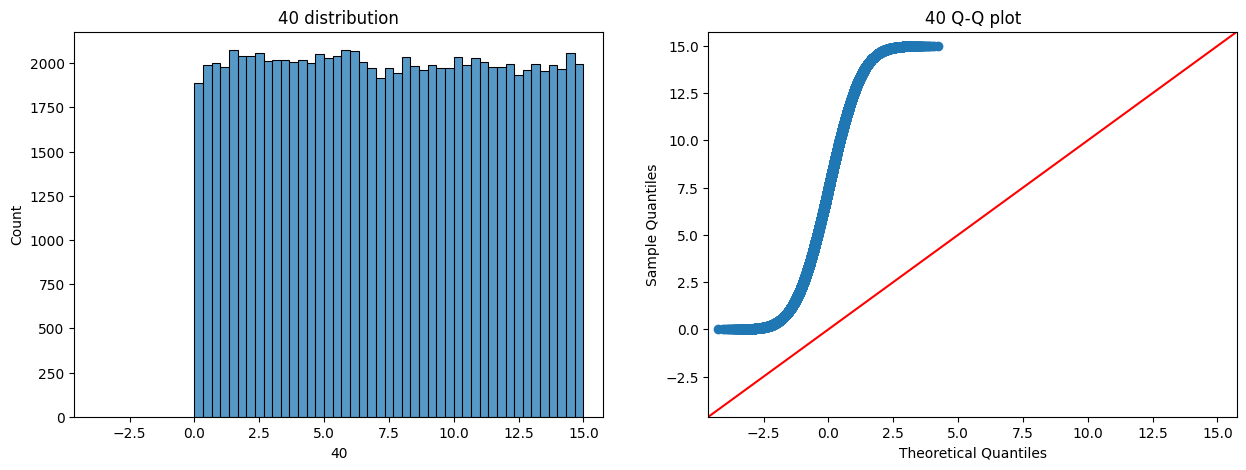

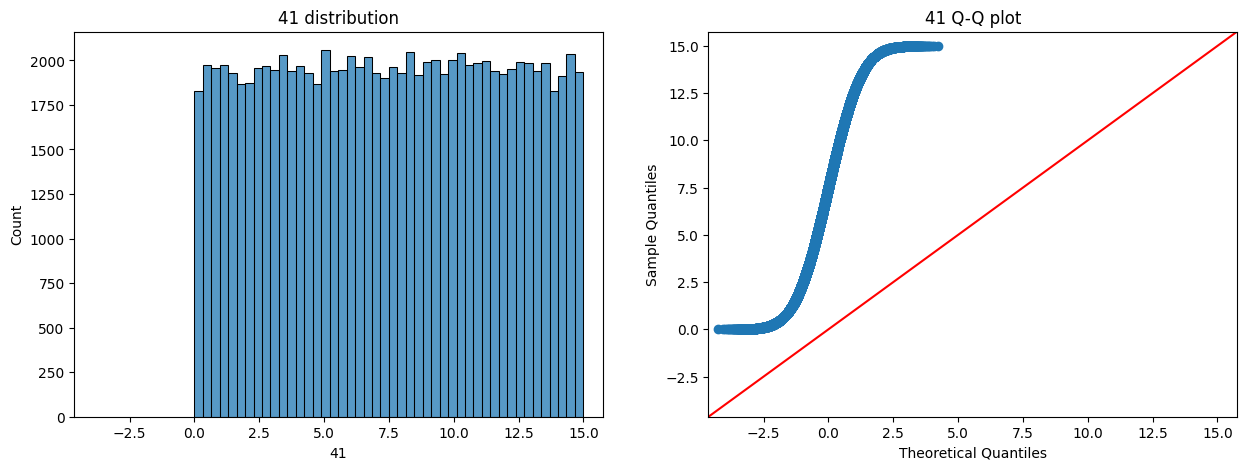

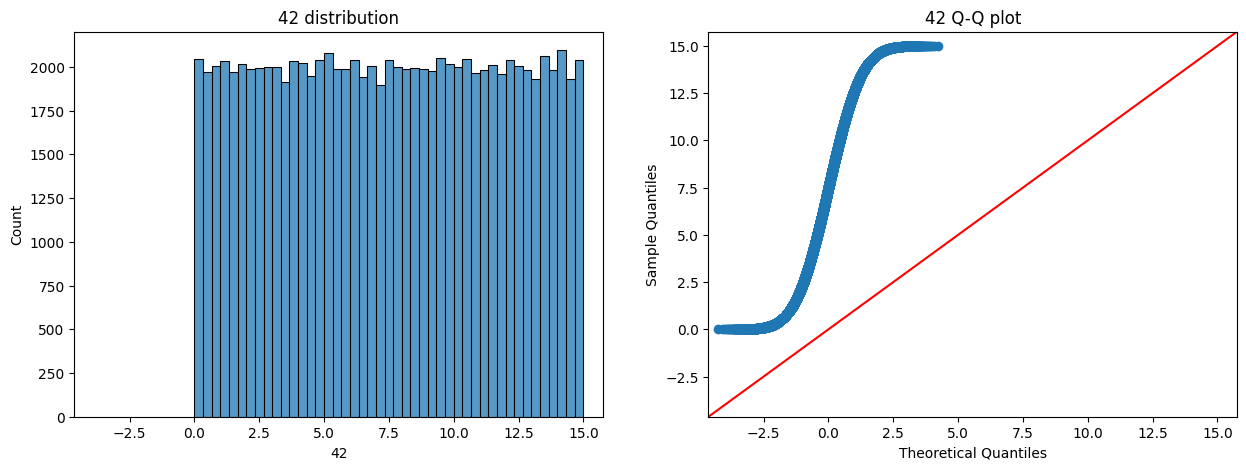

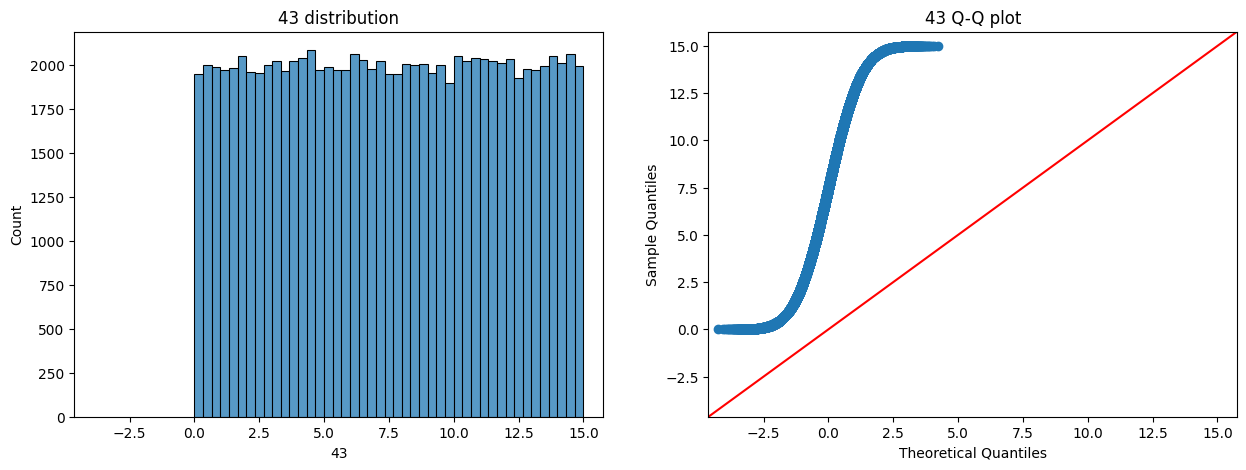

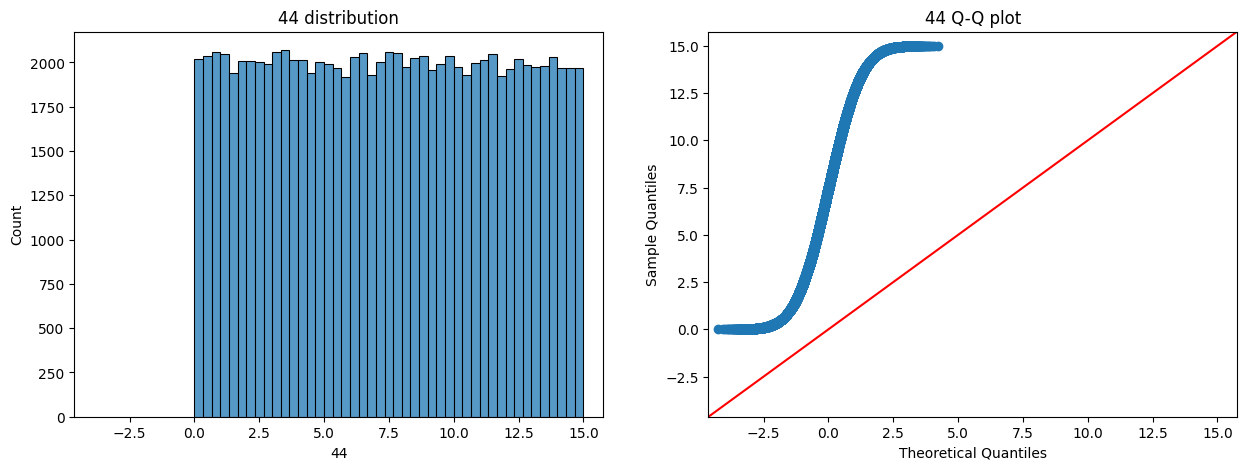

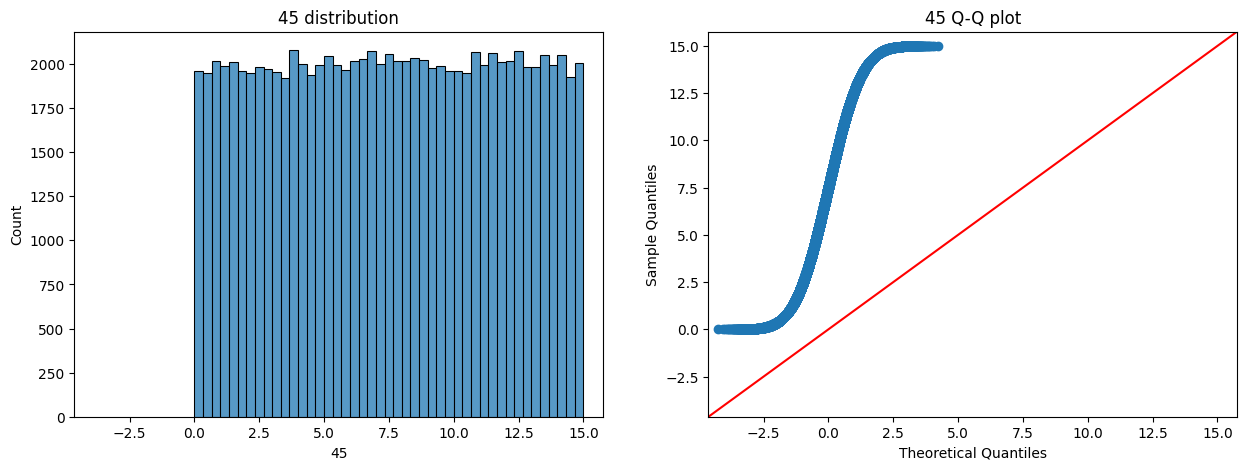

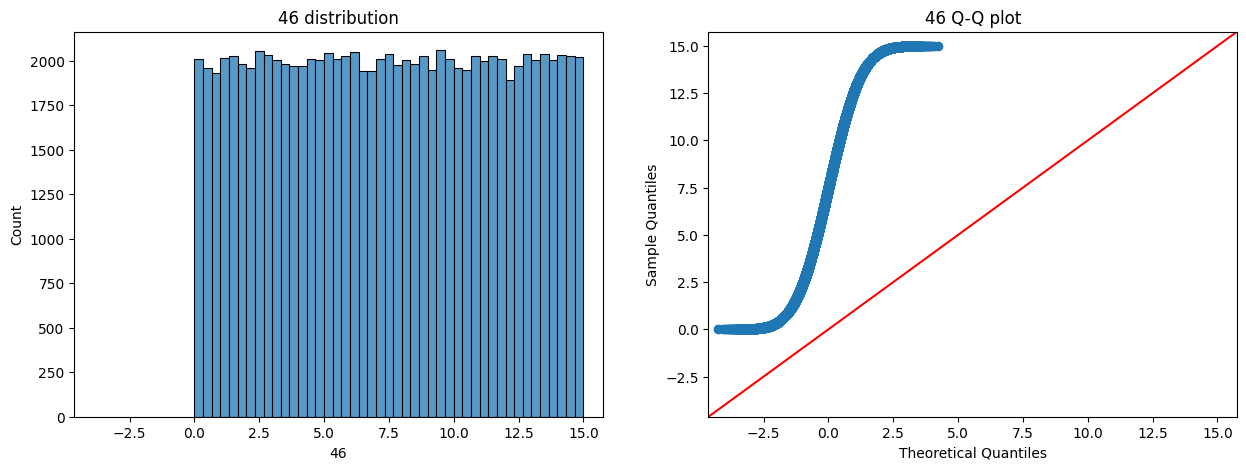

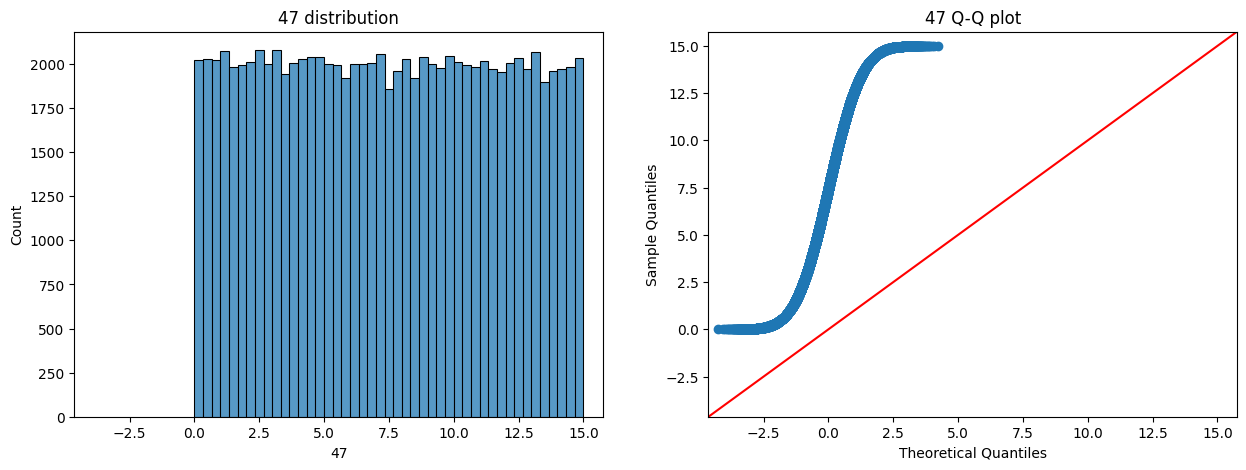

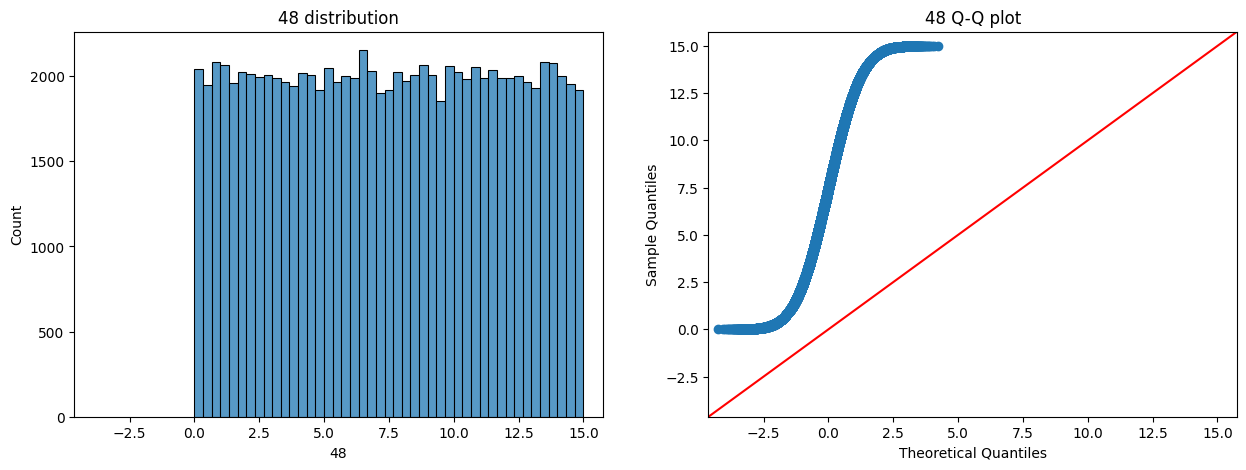

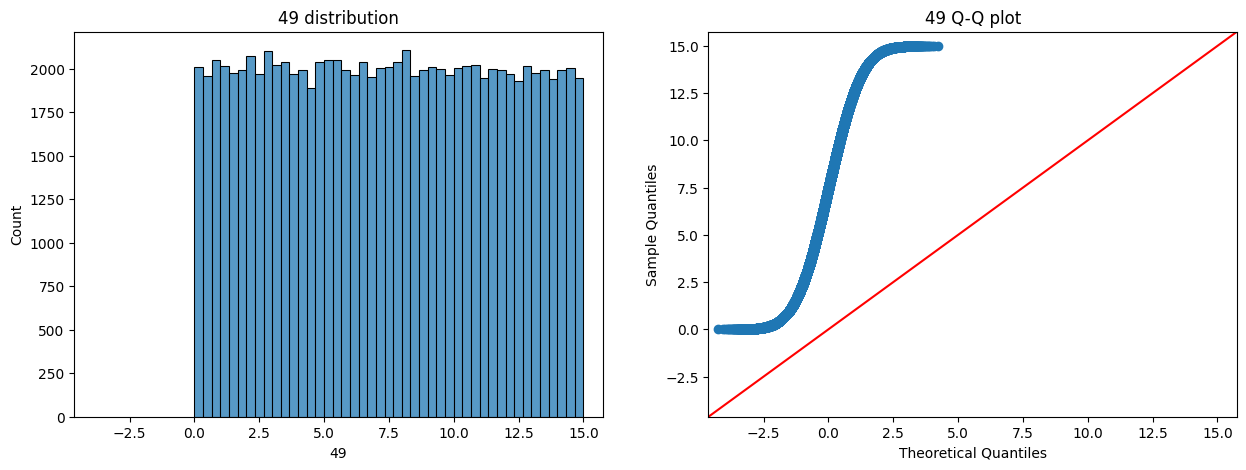

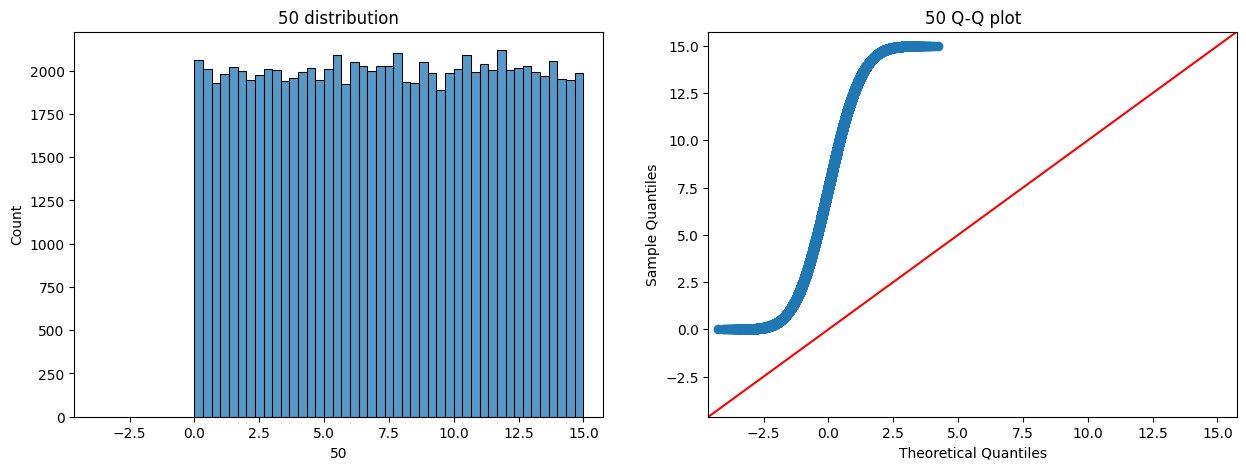

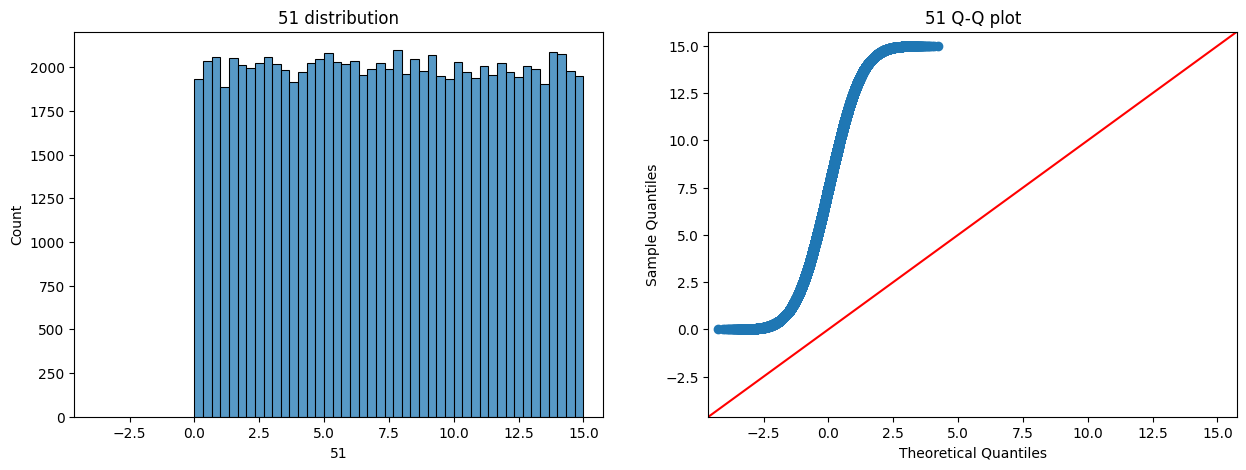

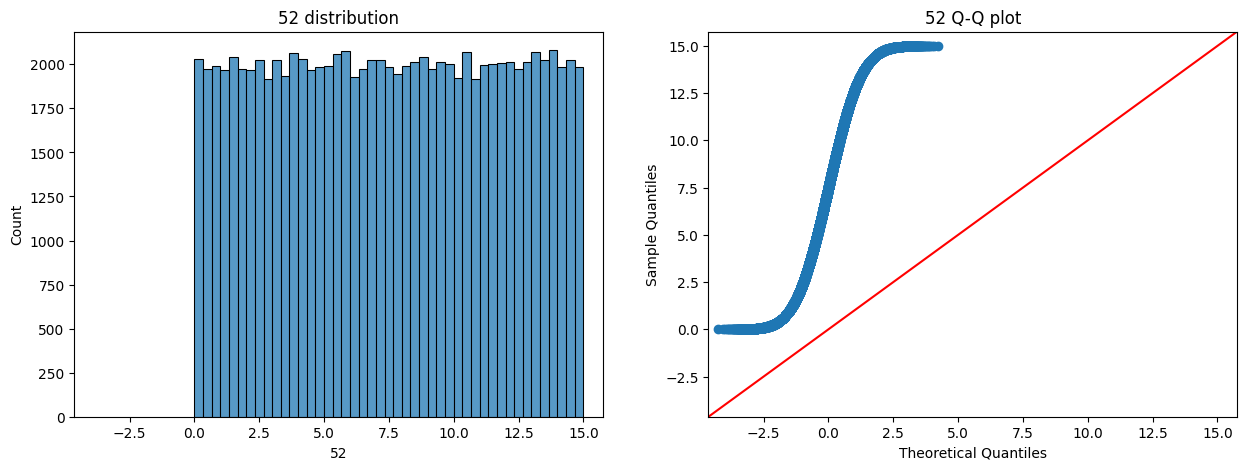

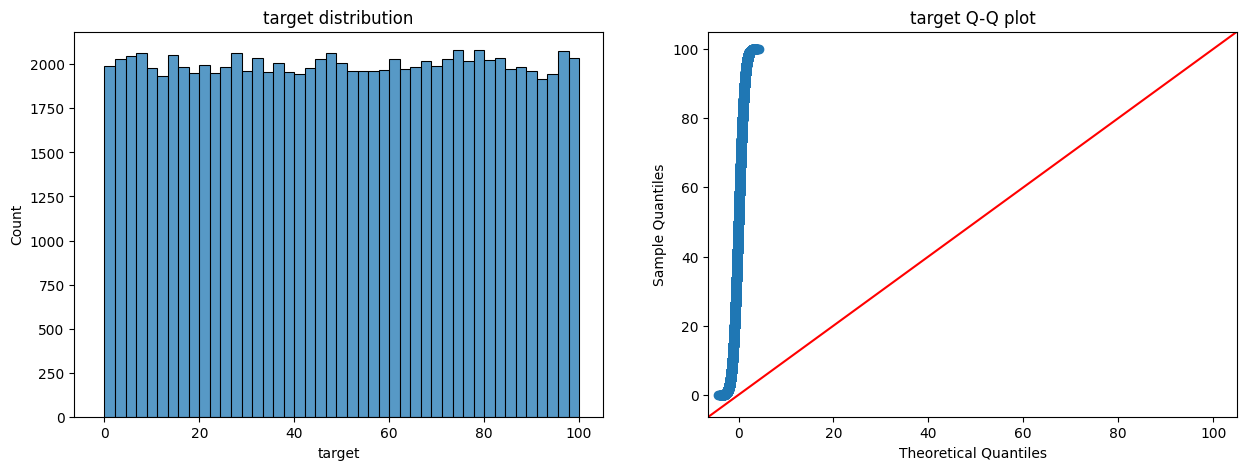

In [21]:
for c in data_train.columns:
    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
    sns.histplot(data_train[c], ax=axes[0])
    axes[0].set_title(f'{c} distribution')
    sm.qqplot(data_train[c], ax=axes[1], line = '45')
    axes[1].set_title(f'{c} Q-Q plot')


# Building and choosing a model

In [22]:
y = data_train.target.values         
X = data_train.drop(['target'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**LinearRegression**

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Rmse: {lr_rmse}')

Rmse: 29.015412891101406


**Random Forest**

In [26]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [27]:
y_pred = rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Rmse: {rf_rmse}')

Rmse: 0.0038279200852112017


**Gradient Boosting Regressor**

In [28]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [31]:
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse_gbr = np.sqrt(mse)
print(f'Rmse: {rmse_gbr}')

Rmse: 0.4167589861416168


# Model evaluation

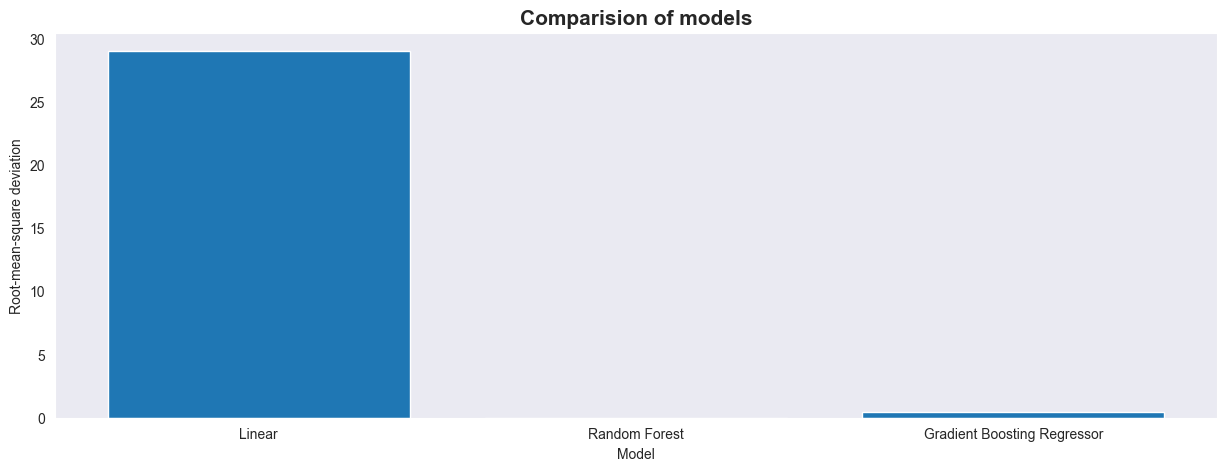

In [33]:
sns.set_style('dark')
plt.figure(figsize = (15, 5))

plt.bar(x = ['Linear', 'Random Forest', 'Gradient Boosting Regressor'], height = [lr_rmse, rf_rmse, rmse_gbr])

plt.xlabel('Model', fontsize = 10)
plt.ylabel('Root-mean-square deviation', fontsize = 10)
plt.title('Comparision of models', fontsize = 15, weight = 'bold')

plt.show()

*So, as we can see, Random Forest is the best model in terms of rmse, so there is no need to normalize the data for the final model. But to get an even better rmse, we will evaluate the importance of the features.*

# Assessing the importance of features

<AxesSubplot: >

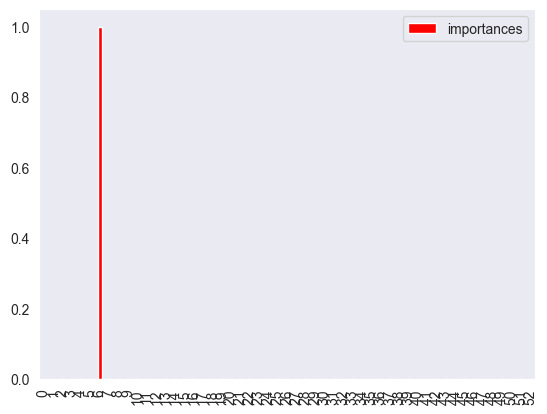

In [41]:
importances = rf.feature_importances_
df = pd.DataFrame({ "importances" : importances}, index=data_train.columns[:-1])
df.set_index('importances')
df.plot.bar(color = 'red')

# Building the final model

In [35]:
y = data_train.target.values 
X = data_train[['6', '7']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [36]:
rf_fmodel = RandomForestRegressor(random_state=0)
rf_fmodel.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [37]:
y_pred = rf_fmodel.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 0.0016033823281488468


In [38]:
hidden_test_data = pd.read_csv('internship_hidden_test.csv')
X_hidden_test = hidden_test_data[['6', '7']]
y_hidden_pred = rf_fmodel.predict(X_hidden_test)

In [39]:
res = pd.DataFrame({'predicted target': y_hidden_pred})
res.to_csv('model predictions.csv')

In [40]:
res

,predicted target
0,11.218887
1,79.700406
2,7.495204
3,38.511647
4,64.760821
...,...
9995,45.437925
9996,32.985505
9997,22.830266
9998,16.502232
